In [2]:
import numpy as np  
import pandas as pd 

from sklearn import preprocessing as pre

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

## Import Data

In [3]:
df_pop = pd.read_csv("data/CityPop.csv",
                    header=0)

##Culture = max 100 points * weight
culture_weight = 2
#Number Of Cinema Seats (1-10)
df_cinema_seats = pd.read_csv("data/Culture/NumberOfCinemaSeats.csv",
                             header=0)
#Number Of Theatre Seats (1-10)
df_theatre_seats = pd.read_csv("data/Culture/NumberOfTheatreSeats.csv",
                              header=0)

##Education = max 100 points * weight
edu_weight = 2
#Average Number Of Students Per Classroom (1-10)
df_students_per_classroom = pd.read_csv("data/Education/AverageNumberOfStudentsPerClassroom.csv",
                                       header=0)
#Average Number Of Students Per Teacher (1-10)
df_students_per_teacher = pd.read_csv("data/Education/AverageNumberOfStudentsPerTeacher.csv",
                                     header=0)
#Number Of Books At Public Libraries (1-10)
df_books_at_library = pd.read_csv("data/Education/NumberOfBooksAtPublicLibraries.csv",
                                 header=0)

##Healthcare = max 100 points * weight
health_weight = 2
#Number Of Doctors Per Thousand People (1-10)
df_doctors_per_patients = pd.read_csv("data/Health/NumberOfDoctorsPerThousandPeople.csv",
                                     header=0)
#Number Of Hospital Beds Per Hundred Thousand People (0-10)
df_hospital_beds = pd.read_csv("data/Health/NumberOfHospitalBedsPerHundredThousandPeople.csv",
                              header=0)

##Natural Disaster Risk = 100 points * weight
natdis_weight = 2
#Earthquake Risk - negative impact (1 - 10)
df_earthquake = pd.read_csv("data/NaturalDisasters/EarthquakeRisk.csv",
                           header=0)
#Flood Risk - negative impact (1 - 10)
df_flood = pd.read_csv("data/NaturalDisasters/Flood.csv",
                      header=0)
#Landslide/Rock fall Risk - negative impact (1 - 10)
df_landslide = pd.read_csv("data/NaturalDisasters/Landslide_RockFall.csv",
                          header=0)

#Econmy
economy_weight = 2
#GDP Per Capita in the Province - (1 - 10)
df_gdp = pd.read_csv("data/Economy/GDP_PerCapita.csv",
                    header=0)
#Unemployment Rate - negative impact (-10 - -1)
df_unemployment = pd.read_csv("data/Economy/Unemployment.csv",
                    header=0) 

## Maximum amount of points to collect: 700
index_factor = 100 / (culture_weight * 100 +
                      edu_weight * 100 +
                      health_weight * 100 +
                      natdis_weight * -1 +
                     economy_weight * 100)

## Provinces and Regions

In [4]:
turkey_provinces = [
    "Adana", "Adıyaman", "Afyonkarahisar", "Ağrı", "Aksaray", "Amasya", "Ankara", "Antalya", "Ardahan", 
    "Artvin", "Aydın", "Balıkesir", "Bartın", "Batman", "Bayburt", "Bilecik", "Bingöl", "Bitlis", 
    "Bolu", "Burdur", "Bursa", "Çanakkale", "Çankırı", "Çorum", "Denizli", "Diyarbakır", "Düzce", 
    "Edirne", "Elazığ", "Erzincan", "Erzurum", "Eskişehir", "Gaziantep", "Giresun", "Gümüşhane", 
    "Hakkari", "Hatay", "Iğdır", "Isparta", "İstanbul", "İzmir", "Kahramanmaraş", "Karabük", 
    "Karaman", "Kars", "Kastamonu", "Kayseri", "Kilis", "Kırıkkale", "Kırklareli", "Kırşehir", 
    "Kocaeli", "Konya", "Kütahya", "Malatya", "Manisa", "Mardin", "Mersin", "Muğla", "Muş", 
    "Nevşehir", "Niğde", "Ordu", "Osmaniye", "Rize", "Sakarya", "Samsun", "Şanlıurfa", "Siirt", 
    "Sinop", "Şırnak", "Sivas", "Tekirdağ", "Tokat", "Trabzon", "Tunceli", "Uşak", "Van", "Yalova", 
    "Yozgat", "Zonguldak"
]
turkey_provinces.sort()

In [5]:
regions_dict = {
    "Aegean": ['Aydın', 'Denizli', 'Muğla', 'İzmir', 'Manisa', 'Afyonkarahisar', 'Kütahya', 'Uşak'],
    "Black Sea": ['Amasya', 'Artvin', 'Bartın', 'Bolu', 'Çorum', 'Düzce', 'Karabük', 'Kastamonu', 'Rize', 'Samsun', 'Sinop', 'Tokat', 'Trabzon', 'Zonguldak', 'Giresun', 'Ordu', 'Bayburt', 'Gümüşhane'],
    "Central Anatolia": ['Aksaray', 'Kayseri', 'Kırşehir', 'Nevşehir', 'Niğde', 'Karaman', 'Konya', 'Ankara', 'Eskişehir', 'Kırıkkale', 'Çankırı', 'Sivas', 'Yozgat'],
    "Eastern Anatolia": ['Ağrı', 'Bingöl', 'Bitlis', 'Elazığ', 'Erzincan', 'Erzurum', 'Hakkari', 'Iğdır', 'Kars', 'Malatya', 'Muş', 'Tunceli', 'Van', 'Ardahan', 'Şırnak'],
    "Marmara": ['Balıkesir', 'Bilecik', 'Bursa', 'Çanakkale', 'Edirne', 'İstanbul', 'Kırklareli', 'Sakarya', 'Tekirdağ', 'Yalova', 'Kocaeli'],
    "Mediterranean": ['Adana', 'Antalya', 'Burdur', 'Hatay', 'Isparta', 'Kahramanmaraş', 'Mersin', 'Osmaniye'],
    "Southeastern Anatolia": ['Adıyaman', 'Batman', 'Diyarbakır', 'Gaziantep', 'Kilis', 'Mardin', 'Siirt', 'Şanlıurfa']
}

list_of_regions = []

for province in turkey_provinces:
    for region, provinces_list in regions_dict.items():
        if province in provinces_list:
            list_of_regions.append(region)
            break

print(len(list_of_regions))

81


## 2021 Livability Index

In [6]:
df_data_2021 = pd.DataFrame({'Province': turkey_provinces, 'Region': list_of_regions})

In [7]:
pop_2021 = df_pop.loc[df_pop['Yıl'] == 2021].sort_values(by='Şehir')['Nüfus'].to_numpy()
pop_2020 = df_pop.loc[df_pop['Yıl'] == 2020].sort_values(by='Şehir')['Nüfus'].to_numpy()

### Culture

In [8]:
cinema_seats_2021 = df_cinema_seats.loc[df_cinema_seats['Yıl'] == 2021].transpose().drop(['Yıl'], axis=0).iloc[:, 0].to_numpy()
cinema_seats_per_people = cinema_seats_2021 / pop_2021
cinema_seats_per_people = cinema_seats_per_people.reshape(-1, 1)
cinema_seats_score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(cinema_seats_per_people), decimals=2)

df_data_2021['CinemaSeats'] = cinema_seats_score
print(df_data_2021)

          Province                 Region  CinemaSeats
0            Adana          Mediterranean         6.01
1         Adıyaman  Southeastern Anatolia         2.51
2   Afyonkarahisar                 Aegean         4.90
3          Aksaray       Central Anatolia         3.85
4           Amasya              Black Sea         3.33
..             ...                    ...          ...
76           Çorum              Black Sea         4.91
77        İstanbul                Marmara         9.17
78           İzmir                 Aegean         7.17
79       Şanlıurfa  Southeastern Anatolia         2.87
80          Şırnak       Eastern Anatolia         2.86

[81 rows x 3 columns]


In [9]:
theatre_seats_2021 = df_theatre_seats.loc[df_theatre_seats['Yıl'] == 2021].transpose().drop(['Yıl'], axis=0).iloc[:, 0].to_numpy()
theatre_seats_per_people = theatre_seats_2021 / pop_2021
theatre_seats_per_people = theatre_seats_per_people.reshape(-1, 1)
theatre_seats_score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(theatre_seats_per_people), decimals=2)

df_data_2021['TheatreSeats'] = theatre_seats_score
print(df_data_2021)

          Province                 Region  CinemaSeats  TheatreSeats
0            Adana          Mediterranean         6.01          2.50
1         Adıyaman  Southeastern Anatolia         2.51          1.00
2   Afyonkarahisar                 Aegean         4.90          4.42
3          Aksaray       Central Anatolia         3.85          1.00
4           Amasya              Black Sea         3.33          2.80
..             ...                    ...          ...           ...
76           Çorum              Black Sea         4.91          2.48
77        İstanbul                Marmara         9.17          3.43
78           İzmir                 Aegean         7.17          4.02
79       Şanlıurfa  Southeastern Anatolia         2.87          1.77
80          Şırnak       Eastern Anatolia         2.86          1.00

[81 rows x 4 columns]


### Education

In [10]:
students_per_classroom = df_students_per_classroom.loc[df_students_per_classroom['Yıl'] == 2021].transpose().drop(['Yıl'], axis=0).iloc[:, 0].to_numpy()
students_per_classroom  = students_per_classroom.reshape(-1, 1) * -1
students_score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(students_per_classroom), decimals=2)

df_data_2021['StudentsPerClassroom'] = students_score
print(df_data_2021)

          Province                 Region  CinemaSeats  TheatreSeats  \
0            Adana          Mediterranean         6.01          2.50   
1         Adıyaman  Southeastern Anatolia         2.51          1.00   
2   Afyonkarahisar                 Aegean         4.90          4.42   
3          Aksaray       Central Anatolia         3.85          1.00   
4           Amasya              Black Sea         3.33          2.80   
..             ...                    ...          ...           ...   
76           Çorum              Black Sea         4.91          2.48   
77        İstanbul                Marmara         9.17          3.43   
78           İzmir                 Aegean         7.17          4.02   
79       Şanlıurfa  Southeastern Anatolia         2.87          1.77   
80          Şırnak       Eastern Anatolia         2.86          1.00   

    StudentsPerClassroom  
0                   3.79  
1                   3.04  
2                   6.57  
3                   5.61  


In [11]:
students_per_teacher = df_students_per_teacher.loc[df_students_per_teacher['Yıl'] == 2021].transpose().drop(['Yıl'], axis=0).iloc[:, 0].to_numpy()
students_per_teacher  = students_per_teacher.reshape(-1, 1) * -1
students_per_teacher_score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(students_per_teacher), decimals=2)

df_data_2021['StudentsPerTeacher'] = students_per_teacher_score
print(df_data_2021)

          Province                 Region  CinemaSeats  TheatreSeats  \
0            Adana          Mediterranean         6.01          2.50   
1         Adıyaman  Southeastern Anatolia         2.51          1.00   
2   Afyonkarahisar                 Aegean         4.90          4.42   
3          Aksaray       Central Anatolia         3.85          1.00   
4           Amasya              Black Sea         3.33          2.80   
..             ...                    ...          ...           ...   
76           Çorum              Black Sea         4.91          2.48   
77        İstanbul                Marmara         9.17          3.43   
78           İzmir                 Aegean         7.17          4.02   
79       Şanlıurfa  Southeastern Anatolia         2.87          1.77   
80          Şırnak       Eastern Anatolia         2.86          1.00   

    StudentsPerClassroom  StudentsPerTeacher  
0                   3.79                3.52  
1                   3.04                5

In [12]:
books_2021 = df_books_at_library.loc[df_books_at_library['Yıl'] == 2021].transpose().drop(['Yıl'], axis=0).iloc[:, 0].to_numpy()
books_per_people = books_2021 / pop_2021
books_per_people = books_per_people.reshape(-1,1)
books_score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(books_per_people), decimals=2)

df_data_2021['BooksPerPeople'] = books_score
print(df_data_2021)

          Province                 Region  CinemaSeats  TheatreSeats  \
0            Adana          Mediterranean         6.01          2.50   
1         Adıyaman  Southeastern Anatolia         2.51          1.00   
2   Afyonkarahisar                 Aegean         4.90          4.42   
3          Aksaray       Central Anatolia         3.85          1.00   
4           Amasya              Black Sea         3.33          2.80   
..             ...                    ...          ...           ...   
76           Çorum              Black Sea         4.91          2.48   
77        İstanbul                Marmara         9.17          3.43   
78           İzmir                 Aegean         7.17          4.02   
79       Şanlıurfa  Southeastern Anatolia         2.87          1.77   
80          Şırnak       Eastern Anatolia         2.86          1.00   

    StudentsPerClassroom  StudentsPerTeacher  BooksPerPeople  
0                   3.79                3.52            1.43  
1        

### Healthcare

In [13]:
doctors_per_patients = df_doctors_per_patients.loc[df_doctors_per_patients['Yıl'] == 2021].transpose().drop(['Yıl'], axis=0).iloc[:, 0].to_numpy()
doctors_per_patients = doctors_per_patients.reshape(-1, 1)
doctors_per_patients_score = np.around(pre.MinMaxScaler((0, 10)).fit_transform(doctors_per_patients), decimals=2)

df_data_2021['DoctorsPerPatients'] = doctors_per_patients_score
print(df_data_2021)

          Province                 Region  CinemaSeats  TheatreSeats  \
0            Adana          Mediterranean         6.01          2.50   
1         Adıyaman  Southeastern Anatolia         2.51          1.00   
2   Afyonkarahisar                 Aegean         4.90          4.42   
3          Aksaray       Central Anatolia         3.85          1.00   
4           Amasya              Black Sea         3.33          2.80   
..             ...                    ...          ...           ...   
76           Çorum              Black Sea         4.91          2.48   
77        İstanbul                Marmara         9.17          3.43   
78           İzmir                 Aegean         7.17          4.02   
79       Şanlıurfa  Southeastern Anatolia         2.87          1.77   
80          Şırnak       Eastern Anatolia         2.86          1.00   

    StudentsPerClassroom  StudentsPerTeacher  BooksPerPeople  \
0                   3.79                3.52            1.43   
1      

In [14]:
hospital_beds_per_patient = df_hospital_beds.loc[df_hospital_beds['Yıl'] == 2021].transpose().drop(['Yıl'], axis=0).iloc[:, 0].to_numpy()
hospital_beds_per_patient = hospital_beds_per_patient.reshape(-1, 1)
hospital_beds_per_patient_score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(hospital_beds_per_patient), decimals=2)

df_data_2021['HospitalBedsPerPatient'] = hospital_beds_per_patient_score
print(df_data_2021)

          Province                 Region  CinemaSeats  TheatreSeats  \
0            Adana          Mediterranean         6.01          2.50   
1         Adıyaman  Southeastern Anatolia         2.51          1.00   
2   Afyonkarahisar                 Aegean         4.90          4.42   
3          Aksaray       Central Anatolia         3.85          1.00   
4           Amasya              Black Sea         3.33          2.80   
..             ...                    ...          ...           ...   
76           Çorum              Black Sea         4.91          2.48   
77        İstanbul                Marmara         9.17          3.43   
78           İzmir                 Aegean         7.17          4.02   
79       Şanlıurfa  Southeastern Anatolia         2.87          1.77   
80          Şırnak       Eastern Anatolia         2.86          1.00   

    StudentsPerClassroom  StudentsPerTeacher  BooksPerPeople  \
0                   3.79                3.52            1.43   
1      

### Natural Disaster Risk

In [15]:
earthquake_score = df_earthquake['Risk'].to_numpy()
earthquake_score = earthquake_score.reshape(-1, 1)
earthquake_score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(earthquake_score), decimals=0)
df_data_2021['EarthquakeRisk'] = earthquake_score
print(df_data_2021)

          Province                 Region  CinemaSeats  TheatreSeats  \
0            Adana          Mediterranean         6.01          2.50   
1         Adıyaman  Southeastern Anatolia         2.51          1.00   
2   Afyonkarahisar                 Aegean         4.90          4.42   
3          Aksaray       Central Anatolia         3.85          1.00   
4           Amasya              Black Sea         3.33          2.80   
..             ...                    ...          ...           ...   
76           Çorum              Black Sea         4.91          2.48   
77        İstanbul                Marmara         9.17          3.43   
78           İzmir                 Aegean         7.17          4.02   
79       Şanlıurfa  Southeastern Anatolia         2.87          1.77   
80          Şırnak       Eastern Anatolia         2.86          1.00   

    StudentsPerClassroom  StudentsPerTeacher  BooksPerPeople  \
0                   3.79                3.52            1.43   
1      

In [16]:
flood_score = df_flood['Flood'].to_numpy()
flood_score = flood_score.reshape(-1, 1)
flood_score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(flood_score), decimals=0)
df_data_2021['FloodRisk'] = flood_score
print(df_data_2021)

          Province                 Region  CinemaSeats  TheatreSeats  \
0            Adana          Mediterranean         6.01          2.50   
1         Adıyaman  Southeastern Anatolia         2.51          1.00   
2   Afyonkarahisar                 Aegean         4.90          4.42   
3          Aksaray       Central Anatolia         3.85          1.00   
4           Amasya              Black Sea         3.33          2.80   
..             ...                    ...          ...           ...   
76           Çorum              Black Sea         4.91          2.48   
77        İstanbul                Marmara         9.17          3.43   
78           İzmir                 Aegean         7.17          4.02   
79       Şanlıurfa  Southeastern Anatolia         2.87          1.77   
80          Şırnak       Eastern Anatolia         2.86          1.00   

    StudentsPerClassroom  StudentsPerTeacher  BooksPerPeople  \
0                   3.79                3.52            1.43   
1      

In [17]:
landslide_score = df_landslide['Landslide/RockFall'].to_numpy()
landslide_score = landslide_score.reshape(-1, 1)
landslide_score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(landslide_score), decimals=0)
df_data_2021['Landslide/RockFallRisk'] = landslide_score
print(df_data_2021)

          Province                 Region  CinemaSeats  TheatreSeats  \
0            Adana          Mediterranean         6.01          2.50   
1         Adıyaman  Southeastern Anatolia         2.51          1.00   
2   Afyonkarahisar                 Aegean         4.90          4.42   
3          Aksaray       Central Anatolia         3.85          1.00   
4           Amasya              Black Sea         3.33          2.80   
..             ...                    ...          ...           ...   
76           Çorum              Black Sea         4.91          2.48   
77        İstanbul                Marmara         9.17          3.43   
78           İzmir                 Aegean         7.17          4.02   
79       Şanlıurfa  Southeastern Anatolia         2.87          1.77   
80          Şırnak       Eastern Anatolia         2.86          1.00   

    StudentsPerClassroom  StudentsPerTeacher  BooksPerPeople  \
0                   3.79                3.52            1.43   
1      

### Economy

In [18]:
gdp_2021 = df_gdp.loc[df_gdp['Yıl'] == 2021].transpose().drop(['Yıl'], axis=0).iloc[:, 0].to_numpy()
gdp_2021 = gdp_2021.reshape(-1,1)
gdp_score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(gdp_2021), decimals=2)

df_data_2021['GDPPerCapita'] = gdp_score
print(df_data_2021)

          Province                 Region  CinemaSeats  TheatreSeats  \
0            Adana          Mediterranean         6.01          2.50   
1         Adıyaman  Southeastern Anatolia         2.51          1.00   
2   Afyonkarahisar                 Aegean         4.90          4.42   
3          Aksaray       Central Anatolia         3.85          1.00   
4           Amasya              Black Sea         3.33          2.80   
..             ...                    ...          ...           ...   
76           Çorum              Black Sea         4.91          2.48   
77        İstanbul                Marmara         9.17          3.43   
78           İzmir                 Aegean         7.17          4.02   
79       Şanlıurfa  Southeastern Anatolia         2.87          1.77   
80          Şırnak       Eastern Anatolia         2.86          1.00   

    StudentsPerClassroom  StudentsPerTeacher  BooksPerPeople  \
0                   3.79                3.52            1.43   
1      

In [19]:
unemp_2021 = df_unemployment.loc[df_unemployment['Year'] == 2021].transpose().drop(['Year'], axis=0).iloc[:, 0].to_numpy()
unemp_2021 = unemp_2021.reshape(-1,1)
unemp_Score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(unemp_2021), decimals=2)

df_data_2021['Unemployment'] = unemp_Score
print(df_data_2021)

          Province                 Region  CinemaSeats  TheatreSeats  \
0            Adana          Mediterranean         6.01          2.50   
1         Adıyaman  Southeastern Anatolia         2.51          1.00   
2   Afyonkarahisar                 Aegean         4.90          4.42   
3          Aksaray       Central Anatolia         3.85          1.00   
4           Amasya              Black Sea         3.33          2.80   
..             ...                    ...          ...           ...   
76           Çorum              Black Sea         4.91          2.48   
77        İstanbul                Marmara         9.17          3.43   
78           İzmir                 Aegean         7.17          4.02   
79       Şanlıurfa  Southeastern Anatolia         2.87          1.77   
80          Şırnak       Eastern Anatolia         2.86          1.00   

    StudentsPerClassroom  StudentsPerTeacher  BooksPerPeople  \
0                   3.79                3.52            1.43   
1      

### Category Scores and Index

In [20]:
culture_lst = df_data_2021['CinemaSeats'].to_numpy() + df_data_2021['TheatreSeats'].to_numpy()
culture_lst = culture_lst.reshape(-1,1)
df_data_2021['Culture'] = np.around(pre.MinMaxScaler((1, 100)).fit_transform(culture_lst), decimals=2)

education_lst = df_data_2021['StudentsPerClassroom'].to_numpy() + df_data_2021['StudentsPerTeacher'].to_numpy() + df_data_2021['BooksPerPeople'].to_numpy()
education_lst = education_lst.reshape(-1,1)
df_data_2021['Education'] = np.around(pre.MinMaxScaler((1, 100)).fit_transform(education_lst), decimals=2)

healthcare_lst = df_data_2021['DoctorsPerPatients'].to_numpy() + df_data_2021['HospitalBedsPerPatient'].to_numpy()
healthcare_lst = healthcare_lst.reshape(-1,1)
df_data_2021['Healthcare'] = np.around(pre.MinMaxScaler((1, 100)).fit_transform(healthcare_lst), decimals=2)

natdis_lst = -df_data_2021['EarthquakeRisk'].to_numpy() + -df_data_2021['FloodRisk'].to_numpy() + -df_data_2021['Landslide/RockFallRisk'].to_numpy()
natdis_lst = natdis_lst.reshape(-1,1)
df_data_2021['NaturalDisasters'] = np.around(pre.MinMaxScaler((-100, -1)).fit_transform(natdis_lst), decimals=2)

economy_lst = df_data_2021['GDPPerCapita'].to_numpy() - df_data_2021['Unemployment'].to_numpy()
economy_lst = economy_lst.reshape(-1,1)
df_data_2021['Economy'] = np.around(pre.MinMaxScaler((1, 100)).fit_transform(economy_lst), decimals=2)

index = ((df_data_2021['Culture'].to_numpy() * culture_weight)
          + (df_data_2021['Education'].to_numpy() * edu_weight)
          + (df_data_2021['Healthcare'].to_numpy() * health_weight)
          + (df_data_2021['NaturalDisasters'].to_numpy() * natdis_weight)
          + (df_data_2021['Economy'].to_numpy()* economy_weight))
index = index * index_factor

if index.min() < 0:
    index = index - index.min()

df_data_2021['Index'] = index.round(2)


In [21]:
df_data_2021['Rank'] = df_data_2021['Index'].rank(ascending=False, method='first').astype(int)

In [22]:
df_data_2021.sort_values(by=['Index'], ascending=False).head(10)

,Province,Region,CinemaSeats,TheatreSeats,StudentsPerClassroom,StudentsPerTeacher,BooksPerPeople,DoctorsPerPatients,HospitalBedsPerPatient,EarthquakeRisk,...,Landslide/RockFallRisk,GDPPerCapita,Unemployment,Culture,Education,Healthcare,NaturalDisasters,Economy,Index,Rank
24,Edirne,Marmara,9.62,5.14,9.04,9.32,4.69,8.33,8.49,4.0,...,1.0,3.95,2.25,99.85,80.27,100.00,-10.90,61.34,83.56,1
5,Ankara,Central Anatolia,8.70,1.78,6.36,6.81,1.30,10.00,5.49,4.0,...,3.0,7.40,2.59,66.69,43.06,91.45,-30.70,81.28,63.81,2
21,Denizli,Aegean,4.78,10.00,7.32,8.06,2.72,4.17,4.89,10.0,...,2.0,4.62,1.75,100.00,58.80,50.11,-50.50,68.84,57.67,3
18,Bolu,Black Sea,7.76,1.00,6.14,7.39,4.40,6.67,8.22,10.0,...,2.0,5.65,2.13,53.37,58.07,87.59,-50.50,73.01,56.24,4
28,Eskişehir,Central Anatolia,6.31,2.61,5.18,7.39,2.44,5.00,7.09,7.0,...,1.0,5.58,1.97,54.61,45.40,69.59,-25.75,73.58,55.21,5
77,İstanbul,Marmara,9.17,3.43,2.29,1.97,1.26,6.25,4.62,7.0,...,1.0,9.09,1.66,83.11,4.25,61.75,-30.70,98.08,54.97,6
34,Isparta,Mediterranean,5.00,1.00,8.07,8.74,8.16,7.50,8.58,10.0,...,1.0,3.48,3.47,31.99,88.60,95.24,-50.50,50.50,54.80,7
46,Kırklareli,Marmara,5.47,1.91,7.43,7.10,3.38,2.08,4.20,1.0,...,2.0,5.97,1.76,42.68,57.98,32.24,-1.00,77.43,53.18,8
55,Nevşehir,Central Anatolia,7.74,1.00,7.21,8.74,10.00,0.83,4.22,4.0,...,2.0,2.76,2.49,53.21,92.84,24.34,-20.80,52.17,51.28,9
59,Rize,Black Sea,7.30,4.35,8.18,8.35,4.37,4.17,5.18,1.0,...,9.0,3.26,4.01,75.75,70.95,51.98,-45.55,45.63,50.53,10


### Dataframe and Index Calculator Function

In [23]:
def create_rating(df, year):
    #Population
    pop = df_pop.loc[df_pop['Yıl'] == year].sort_values(by='Şehir')['Nüfus'].to_numpy()
    
    #Cinema Seats Per People
    cinema_seats = df_cinema_seats.loc[df_cinema_seats['Yıl'] == year].transpose().drop(['Yıl'], axis=0).iloc[:, 0].to_numpy()
    cinema_seats_per_people = cinema_seats / pop
    cinema_seats_per_people = cinema_seats_per_people.reshape(-1, 1)
    cinema_seats_score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(cinema_seats_per_people), decimals=2)

    df['CinemaSeats'] = cinema_seats_score
    
    #Theatre Seats Per People
    theatre_seats = df_theatre_seats.loc[df_theatre_seats['Yıl'] == year].transpose().drop(['Yıl'], axis=0).iloc[:, 0].to_numpy()
    theatre_seats_per_people = theatre_seats / pop
    theatre_seats_per_people = theatre_seats_per_people.reshape(-1, 1)
    theatre_seats_score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(theatre_seats_per_people), decimals=2)

    df['TheatreSeats'] = theatre_seats_score
    
    #Number of Students Per Classrom
    students_per_classroom = df_students_per_classroom.loc[df_students_per_classroom['Yıl'] == year].transpose().drop(['Yıl'], axis=0).iloc[:, 0].to_numpy()
    students_per_classroom  = students_per_classroom.reshape(-1, 1) * -1
    students_score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(students_per_classroom), decimals=2)

    df['StudentsPerClassroom'] = students_score
    
    #Number of Students Per Teacher
    students_per_teacher = df_students_per_teacher.loc[df_students_per_teacher['Yıl'] == year].transpose().drop(['Yıl'], axis=0).iloc[:, 0].to_numpy()
    students_per_teacher  = students_per_teacher.reshape(-1, 1) * -1
    students_per_teacher_score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(students_per_teacher), decimals=2)

    df['StudentsPerTeacher'] = students_per_teacher_score
    
    #Number of Books at Public Libraries Per People
    books = df_books_at_library.loc[df_books_at_library['Yıl'] == year].transpose().drop(['Yıl'], axis=0).iloc[:, 0].to_numpy()
    books_per_people = books / pop
    books_per_people = books_per_people.reshape(-1,1)
    books_score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(books_per_people), decimals=2)

    df['BooksPerPeople'] = books_score
    
    #Number Of Doctors Per Thousand People
    doctors_per_patients = df_doctors_per_patients.loc[df_doctors_per_patients['Yıl'] == year].transpose().drop(['Yıl'], axis=0).iloc[:, 0].to_numpy()
    doctors_per_patients = doctors_per_patients.reshape(-1, 1)
    doctors_per_patients_score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(doctors_per_patients), decimals=2)

    df['DoctorsPerPatients'] = doctors_per_patients_score
    
    #Number Of Hospital Beds Per Hundred Thousand People
    hospital_beds_per_patient = df_hospital_beds.loc[df_hospital_beds['Yıl'] == year].transpose().drop(['Yıl'], axis=0).iloc[:, 0].to_numpy()
    hospital_beds_per_patient = hospital_beds_per_patient.reshape(-1, 1)
    hospital_beds_per_patient_score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(hospital_beds_per_patient), decimals=2)

    df['HospitalBedsPerPatient'] = hospital_beds_per_patient_score
    
    #Earthquake Risk - negative impact
    earthquake_score = df_earthquake['Risk'].to_numpy()
    earthquake_score = earthquake_score.reshape(-1, 1)
    earthquake_score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(earthquake_score), decimals=2)
    df['EarthquakeRisk'] = earthquake_score
    
    #Flood Risk
    flood_score = df_flood['Flood'].to_numpy()
    flood_score = flood_score.reshape(-1, 1)
    flood_score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(flood_score), decimals=0)
    df['FloodRisk'] = flood_score
    
    #Landslide/RockFall Risk
    landslide_score = df_landslide['Landslide/RockFall'].to_numpy()
    landslide_score = landslide_score.reshape(-1, 1)
    landslide_score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(landslide_score), decimals=0)
    df['Landslide/RockFallRisk'] = landslide_score
    
    #GDP Per Capita
    gdp = df_gdp.loc[df_gdp['Yıl'] == year].transpose().drop(['Yıl'], axis=0).iloc[:, 0].to_numpy()
    gdp = gdp.reshape(-1,1)
    gdp_score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(gdp), decimals=2)
    df['GDPPerCapita'] = gdp_score
    
    #Unemployment
    unemp = df_unemployment.loc[df_unemployment['Year'] == year].transpose().drop(['Year'], axis=0).iloc[:, 0].to_numpy()
    unemp = unemp.reshape(-1,1)
    unemp_Score = np.around(pre.MinMaxScaler((1, 10)).fit_transform(unemp), decimals=2)
    df['Unemployment'] = unemp_Score
    
    culture_lst = df['CinemaSeats'].to_numpy() + df['TheatreSeats'].to_numpy()
    culture_lst = culture_lst.reshape(-1,1)
    df['Culture'] = np.around(pre.MinMaxScaler((1, 100)).fit_transform(culture_lst), decimals=2)

    education_lst = df['StudentsPerClassroom'].to_numpy() + df['StudentsPerTeacher'].to_numpy() + df['BooksPerPeople'].to_numpy()
    education_lst = education_lst.reshape(-1,1)
    df['Education'] = np.around(pre.MinMaxScaler((1, 100)).fit_transform(education_lst), decimals=2)

    healthcare_lst = df['DoctorsPerPatients'].to_numpy() + df['HospitalBedsPerPatient'].to_numpy()
    healthcare_lst = healthcare_lst.reshape(-1,1)
    df['Healthcare'] = np.around(pre.MinMaxScaler((1, 100)).fit_transform(healthcare_lst), decimals=2)

    natdis_lst = -df['EarthquakeRisk'].to_numpy() + -df['FloodRisk'].to_numpy() + -df['Landslide/RockFallRisk'].to_numpy()
    natdis_lst = natdis_lst.reshape(-1,1)
    df['NaturalDisasters'] = np.around(pre.MinMaxScaler((-100, -1)).fit_transform(natdis_lst), decimals=2)

    economy_lst = df['GDPPerCapita'].to_numpy() - df['Unemployment'].to_numpy()
    economy_lst = economy_lst.reshape(-1,1)
    df['Economy'] = np.around(pre.MinMaxScaler((1, 100)).fit_transform(economy_lst), decimals=2)

    index = ((df['Culture'].to_numpy() * culture_weight)
              + (df['Education'].to_numpy() * edu_weight)
              + (df['Healthcare'].to_numpy() * health_weight)
              + (df['NaturalDisasters'].to_numpy() * natdis_weight)
              + (df['Economy'].to_numpy()* economy_weight))
    index = index * index_factor
    
    if index.min() < 0:
        index = index - index.min()
    
    df['Index'] = index.round(2)
    
    df['Rank'] = df['Index'].rank(ascending=False, method='first').astype(int)
    
    return df

In [24]:
df_data_2020 = pd.DataFrame({'Province': turkey_provinces, 'Region': list_of_regions})
df_data_2020 = create_rating(df_data_2020, 2020)

In [25]:
df_data_2020.sort_values(by=['Index'], ascending=False).head(10)

,Province,Region,CinemaSeats,TheatreSeats,StudentsPerClassroom,StudentsPerTeacher,BooksPerPeople,DoctorsPerPatients,HospitalBedsPerPatient,EarthquakeRisk,...,Landslide/RockFallRisk,GDPPerCapita,Unemployment,Culture,Education,Healthcare,NaturalDisasters,Economy,Index,Rank
24,Edirne,Marmara,10.00,7.75,8.20,8.42,4.64,8.83,8.59,4.0,...,1.0,4.49,1.94,100.00,74.05,100.00,-10.90,63.68,84.19,1
28,Eskişehir,Central Anatolia,6.12,7.13,5.35,7.77,2.36,6.09,7.40,7.0,...,1.0,6.19,1.77,71.71,50.68,74.11,-25.75,75.33,63.95,2
5,Ankara,Central Anatolia,7.45,3.97,5.65,6.29,1.21,10.00,5.74,4.0,...,3.0,8.46,2.37,60.21,41.26,88.93,-30.70,85.73,63.78,3
18,Bolu,Black Sea,7.32,4.52,5.65,6.85,4.34,7.26,8.66,10.0,...,2.0,6.28,2.03,62.85,56.18,90.12,-50.50,74.27,60.65,4
77,İstanbul,Marmara,8.79,5.91,1.75,1.93,1.11,6.48,4.60,7.0,...,1.0,10.00,1.62,80.83,7.47,58.24,-30.70,100.00,56.37,5
55,Nevşehir,Central Anatolia,7.56,6.59,6.70,7.77,10.00,1.78,3.23,4.0,...,2.0,3.25,2.32,77.37,87.02,18.26,-20.80,53.58,56.27,6
34,Isparta,Mediterranean,4.55,3.53,7.00,7.77,8.04,7.65,8.56,10.0,...,1.0,4.13,3.21,39.22,80.31,92.03,-50.50,53.52,56.05,7
46,Kırklareli,Marmara,6.57,3.08,6.25,6.57,3.27,2.96,4.12,1.0,...,2.0,6.46,1.63,49.09,53.15,31.89,-1.00,77.88,55.16,8
31,Gümüşhane,Black Sea,2.18,10.00,7.45,8.70,6.90,2.96,5.17,4.0,...,3.0,3.03,2.42,64.99,81.28,38.81,-25.75,51.59,55.14,9
8,Artvin,Black Sea,4.65,5.36,7.90,8.42,6.48,4.13,2.64,4.0,...,1.0,5.82,3.81,51.35,80.27,29.85,-15.85,60.31,53.88,10


In [26]:
df_data_2019 = pd.DataFrame({'Province': turkey_provinces, 'Region': list_of_regions})
df_data_2019 = create_rating(df_data_2019, 2019)

df_data_2018 = pd.DataFrame({'Province': turkey_provinces, 'Region': list_of_regions})
df_data_2018 = create_rating(df_data_2018, 2018)

df_data_2017 = pd.DataFrame({'Province': turkey_provinces, 'Region': list_of_regions})
df_data_2017 = create_rating(df_data_2017, 2017)

In [27]:
df_data_2019.sort_values(by=['Index'], ascending=False).head(10)

,Province,Region,CinemaSeats,TheatreSeats,StudentsPerClassroom,StudentsPerTeacher,BooksPerPeople,DoctorsPerPatients,HospitalBedsPerPatient,EarthquakeRisk,...,Landslide/RockFallRisk,GDPPerCapita,Unemployment,Culture,Education,Healthcare,NaturalDisasters,Economy,Index,Rank
24,Edirne,Marmara,8.90,7.13,7.49,8.35,4.41,9.57,9.12,4.0,...,1.0,4.53,2.07,91.72,71.88,100.00,-10.90,63.61,80.48,1
18,Bolu,Black Sea,7.27,6.78,5.87,6.81,4.22,7.00,8.98,10.0,...,2.0,5.85,2.20,78.92,58.07,83.50,-50.50,70.99,61.60,2
8,Artvin,Black Sea,10.00,7.31,7.20,8.06,6.05,4.00,2.93,4.0,...,1.0,5.35,4.92,100.00,76.25,28.40,-15.85,51.03,61.31,3
5,Ankara,Central Anatolia,7.35,4.24,4.98,6.13,1.21,10.00,6.21,4.0,...,3.0,8.00,2.50,63.01,39.18,84.90,-30.70,82.46,61.07,4
28,Eskişehir,Central Anatolia,6.02,6.38,4.98,7.10,2.22,6.57,7.42,7.0,...,1.0,6.01,1.88,68.25,47.35,71.38,-25.75,73.96,60.15,5
46,Kırklareli,Marmara,6.52,3.89,6.31,6.42,3.12,2.71,4.09,1.0,...,2.0,6.21,1.86,55.38,53.74,27.61,-1.00,75.33,54.10,6
77,İstanbul,Marmara,9.25,5.45,1.89,1.29,1.02,6.14,4.33,7.0,...,1.0,10.00,1.67,83.12,5.70,49.95,-30.70,100.00,53.35,7
34,Isparta,Mediterranean,4.45,3.64,6.75,8.06,7.80,7.86,8.79,10.0,...,1.0,4.16,4.10,40.38,81.61,87.58,-50.50,48.73,53.28,8
55,Nevşehir,Central Anatolia,6.47,5.21,6.75,7.10,10.00,2.29,3.58,4.0,...,2.0,3.57,2.40,63.59,86.72,21.94,-20.80,55.61,53.10,9
78,İzmir,Aegean,7.40,6.35,3.95,6.13,1.11,7.86,4.74,10.0,...,2.0,6.63,1.80,76.98,34.52,62.92,-50.50,78.30,51.88,10


In [28]:
df_data_2018.sort_values(by=['Index'], ascending=False).head(10)

,Province,Region,CinemaSeats,TheatreSeats,StudentsPerClassroom,StudentsPerTeacher,BooksPerPeople,DoctorsPerPatients,HospitalBedsPerPatient,EarthquakeRisk,...,Landslide/RockFallRisk,GDPPerCapita,Unemployment,Culture,Education,Healthcare,NaturalDisasters,Economy,Index,Rank
24,Edirne,Marmara,9.10,10.00,7.49,8.45,4.13,9.57,9.25,4.0,...,1.0,4.27,2.30,100.00,71.87,100.00,-10.90,60.99,84.63,1
18,Bolu,Black Sea,8.47,7.15,5.43,7.10,3.96,7.43,9.10,10.0,...,2.0,5.81,2.16,78.80,56.67,86.52,-50.50,71.40,64.81,2
28,Eskişehir,Central Anatolia,6.36,6.87,4.54,7.77,2.18,6.57,7.76,7.0,...,1.0,5.93,1.87,64.24,48.19,73.57,-25.75,73.93,62.63,3
5,Ankara,Central Anatolia,7.72,4.54,4.84,6.81,1.19,10.00,5.99,4.0,...,3.0,7.55,2.53,58.33,41.19,83.34,-30.70,79.88,62.10,4
55,Nevşehir,Central Anatolia,7.73,5.93,7.05,7.48,10.00,2.29,3.69,4.0,...,2.0,3.28,2.61,66.86,90.79,24.43,-20.80,52.95,57.63,5
77,İstanbul,Marmara,10.00,6.00,2.33,1.68,1.00,6.57,4.32,7.0,...,1.0,9.80,1.53,81.11,7.96,53.33,-30.70,100.00,57.00,6
46,Kırklareli,Marmara,6.68,3.82,6.61,6.13,2.93,3.14,4.09,1.0,...,2.0,5.92,1.70,47.61,53.19,31.78,-1.00,74.92,55.69,7
34,Isparta,Mediterranean,4.93,4.43,6.46,7.77,7.40,7.86,8.96,10.0,...,1.0,4.08,4.07,40.66,78.49,88.23,-50.50,48.86,55.50,8
78,İzmir,Aegean,6.72,7.23,3.95,6.81,1.08,8.29,4.70,10.0,...,2.0,6.71,1.73,68.62,36.94,65.69,-50.50,79.63,54.16,9
74,Çanakkale,Marmara,3.12,8.43,6.46,7.77,2.72,5.29,5.41,10.0,...,1.0,5.53,2.53,54.00,58.63,52.21,-40.60,67.37,51.96,10


In [29]:
df_data_2017.sort_values(by=['Index'], ascending=False).head(10)

,Province,Region,CinemaSeats,TheatreSeats,StudentsPerClassroom,StudentsPerTeacher,BooksPerPeople,DoctorsPerPatients,HospitalBedsPerPatient,EarthquakeRisk,...,Landslide/RockFallRisk,GDPPerCapita,Unemployment,Culture,Education,Healthcare,NaturalDisasters,Economy,Index,Rank
24,Edirne,Marmara,5.14,10.00,7.53,8.50,4.03,8.04,9.65,4.0,...,1.0,4.33,2.48,80.71,68.00,97.84,-10.90,60.13,80.21,1
18,Bolu,Black Sea,8.71,9.61,6.05,7.45,3.84,8.04,10.00,10.0,...,2.0,5.93,2.31,100.00,55.41,100.00,-50.50,71.05,75.24,2
5,Ankara,Central Anatolia,7.60,4.79,4.95,7.00,2.11,10.00,6.34,4.0,...,3.0,7.95,2.69,64.03,40.22,89.51,-30.70,81.18,67.29,3
28,Eskişehir,Central Anatolia,6.01,6.78,5.07,7.98,2.12,6.09,6.82,7.0,...,1.0,6.02,2.17,66.45,45.36,68.34,-25.75,72.47,62.94,4
55,Nevşehir,Central Anatolia,7.88,6.82,6.92,7.75,10.00,2.57,3.83,4.0,...,2.0,3.10,2.68,78.04,89.35,28.16,-20.80,51.30,62.73,5
77,İstanbul,Marmara,10.00,5.56,3.22,3.48,1.00,5.70,4.21,7.0,...,1.0,10.00,1.69,83.26,10.77,49.82,-30.70,100.00,59.50,6
8,Artvin,Black Sea,5.76,7.78,7.41,7.98,5.35,4.52,3.08,4.0,...,1.0,4.62,6.18,71.00,71.15,35.56,-15.85,39.08,56.44,7
46,Kırklareli,Marmara,4.25,4.29,6.30,7.00,3.09,3.35,4.08,1.0,...,2.0,5.75,1.94,40.67,51.01,34.51,-1.00,72.23,55.56,8
78,İzmir,Aegean,6.23,7.32,4.33,7.00,1.06,7.65,4.86,10.0,...,2.0,6.60,1.86,71.06,32.49,65.87,-50.50,77.97,55.42,9
34,Isparta,Mediterranean,2.79,3.20,6.05,8.50,7.20,7.65,9.30,10.0,...,1.0,4.14,3.77,25.20,75.83,93.27,-50.50,50.99,54.90,10


### Export Data

In [30]:
#Export data as csv
df_data_2021.to_csv("Results/data_2021.csv", index=False)
df_data_2020.to_csv("Results/data_2020.csv", index=False)
df_data_2019.to_csv("Results/data_2019.csv", index=False)
df_data_2018.to_csv("Results/data_2018.csv", index=False)
df_data_2017.to_csv("Results/data_2017.csv", index=False)

### Top 10 positions for 2021

In [31]:
columns = ['Province', 'Rank', 'Index', 'Culture', 'Education', 'Healthcare',  'Economy', 'NaturalDisasters']
df_data_2021[columns].sort_values(by='Rank').head(10)

,Province,Rank,Index,Culture,Education,Healthcare,Economy,NaturalDisasters
24,Edirne,1,83.56,99.85,80.27,100.00,61.34,-10.90
5,Ankara,2,63.81,66.69,43.06,91.45,81.28,-30.70
21,Denizli,3,57.67,100.00,58.80,50.11,68.84,-50.50
18,Bolu,4,56.24,53.37,58.07,87.59,73.01,-50.50
28,Eskişehir,5,55.21,54.61,45.40,69.59,73.58,-25.75
77,İstanbul,6,54.97,83.11,4.25,61.75,98.08,-30.70
34,Isparta,7,54.80,31.99,88.60,95.24,50.50,-50.50
46,Kırklareli,8,53.18,42.68,57.98,32.24,77.43,-1.00
55,Nevşehir,9,51.28,53.21,92.84,24.34,52.17,-20.80
59,Rize,10,50.53,75.75,70.95,51.98,45.63,-45.55


### Bottom 10 positions for 2021

In [32]:
df_data_2021[columns].sort_values(by='Rank').tail(10)

,Province,Rank,Index,Culture,Education,Healthcare,Economy,NaturalDisasters
36,Kahramanmaraş,72,17.15,17.27,20.12,28.58,55.05,-55.45
17,Bitlis,73,16.12,24.08,33.09,30.51,34.21,-60.40
79,Şanlıurfa,74,15.66,21.45,1.00,7.43,50.56,-20.80
16,Bingöl,75,13.93,23.62,47.88,22.92,38.51,-80.20
54,Muş,76,13.89,47.40,32.96,6.46,16.26,-50.50
1,Adıyaman,77,13.82,12.70,28.80,23.82,37.48,-50.50
10,Ağrı,78,12.81,10.53,24.76,3.31,45.31,-35.65
70,Van,79,11.45,25.87,17.00,25.36,39.98,-65.35
32,Hakkari,80,1.98,1.00,11.58,14.69,28.31,-50.50
80,Şırnak,81,0.00,15.41,10.45,1.00,1.00,-30.70


### Regions 2021

In [33]:
df_regions_2021 = df_data_2021.groupby(['Region'])[['Region', 'Index']].mean(numeric_only=True).reset_index().round(2)
df_regions_2021

,Region,Index
0,Aegean,44.41
1,Black Sea,40.15
2,Central Anatolia,44.27
3,Eastern Anatolia,23.08
4,Marmara,46.70
5,Mediterranean,33.28
6,Southeastern Anatolia,21.81


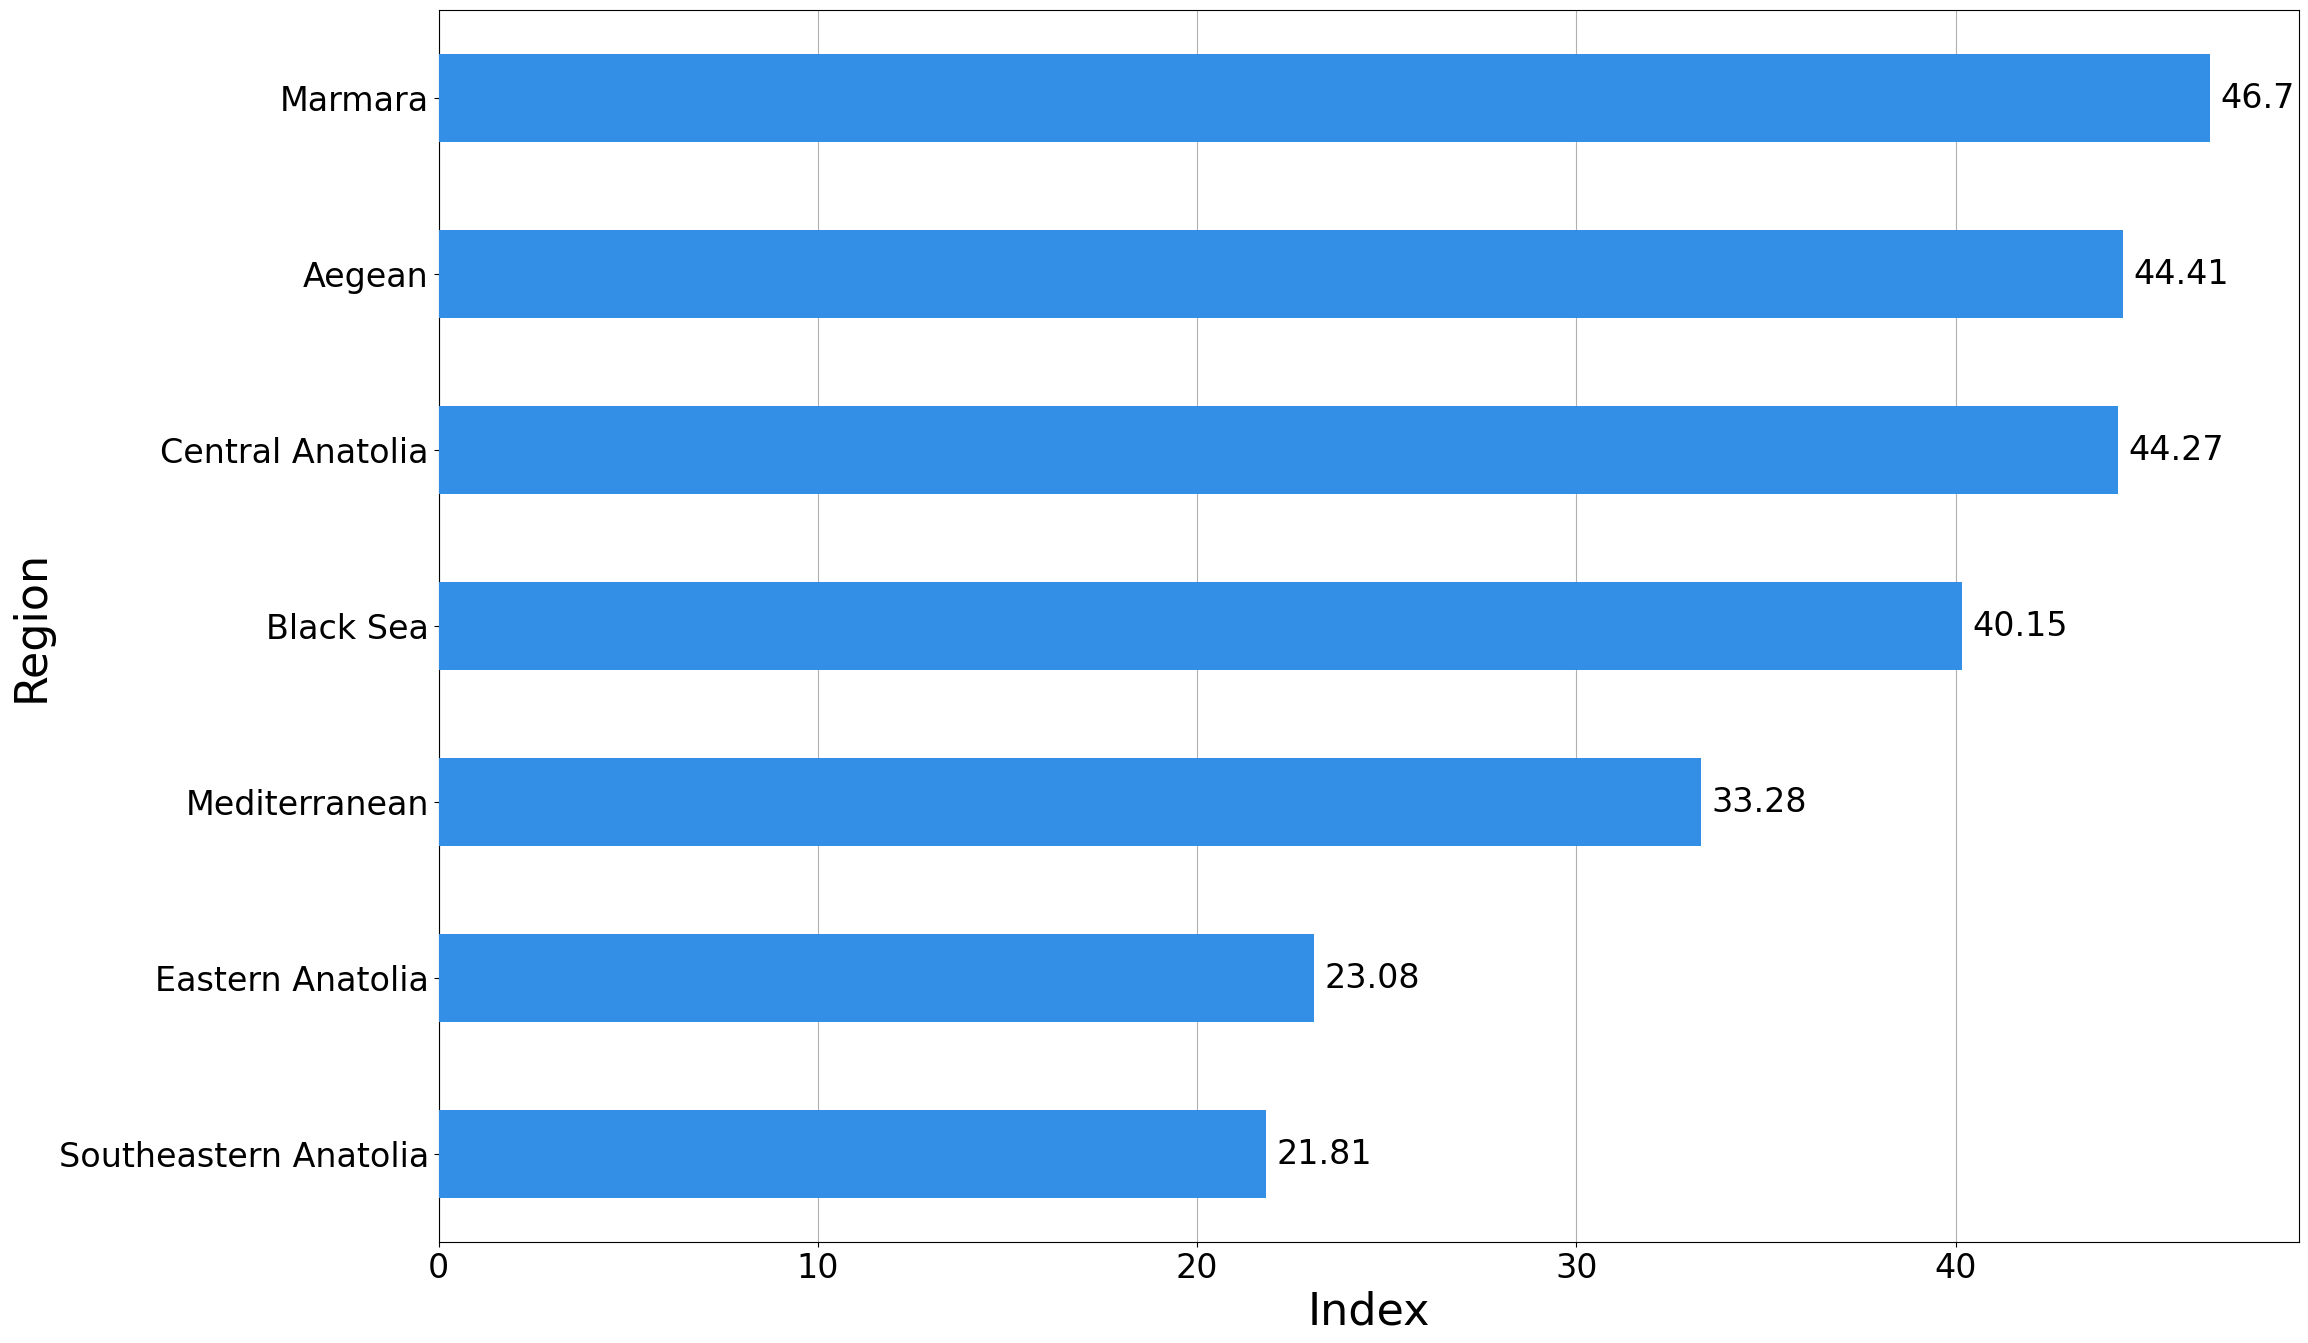

In [43]:
fig, ax2 = plt.subplots()
df_regions_2021.sort_values(by=['Index']).plot(ax=ax2 ,kind='barh',
                                                x='Region', y='Index', color=(0.2, 0.56,0.90),
                                                figsize=(24,16), legend=False, zorder=5, fontsize=24)
ax2.grid(axis='x', zorder=0)
ax2.bar_label(ax2.containers[0], padding=7.5, fontsize=24)
ax2.set_xlabel(xlabel='Index', fontsize=32)
ax2.set_ylabel(ylabel='Region', fontsize=32)

plt.show()
#plt.savefig("Results/2021/tur_2021_regions_bar.png",dpi=500, format='png', transparent=False)
                                                                                           

In [44]:
df_data_2021.groupby(['Region'])[['Region', 'Index', 'Culture', 'Education', 'Healthcare', 'Economy', 'NaturalDisasters']].mean(numeric_only=True).reset_index().round(2).sort_values(by='Index', ascending=False)



,Region,Index,Culture,Education,Healthcare,Economy,NaturalDisasters
4,Marmara,46.70,58.87,41.26,40.60,78.88,-36.10
0,Aegean,44.41,61.66,51.71,43.48,64.92,-47.41
2,Central Anatolia,44.27,43.56,58.22,45.21,59.04,-32.22
1,Black Sea,40.15,41.10,64.16,43.79,51.66,-43.35
5,Mediterranean,33.28,37.95,40.28,41.76,59.23,-49.26
3,Eastern Anatolia,23.08,25.08,43.55,31.92,42.19,-53.47
6,Southeastern Anatolia,21.81,28.83,15.27,23.10,45.21,-28.22


In [45]:
region_21 = df_data_2021.groupby(['Region'])[['Region', 'Index']].mean(numeric_only=True).reset_index().round(2)
region_20 = df_data_2020.groupby(['Region'])[['Region', 'Index']].mean(numeric_only=True).reset_index().round(2)


In [46]:
region_merged = pd.merge(region_20, region_21, on='Region')
region_merged.columns = ['Region', '2020', '2021']
region_merged.sort_values(by='2021',ascending=True, inplace=True)
region_merged

,Region,2020,2021
6,Southeastern Anatolia,23.05,21.81
3,Eastern Anatolia,26.04,23.08
5,Mediterranean,33.01,33.28
1,Black Sea,43.17,40.15
2,Central Anatolia,46.18,44.27
0,Aegean,42.49,44.41
4,Marmara,48.28,46.70


Text(0, 0.5, 'Region')

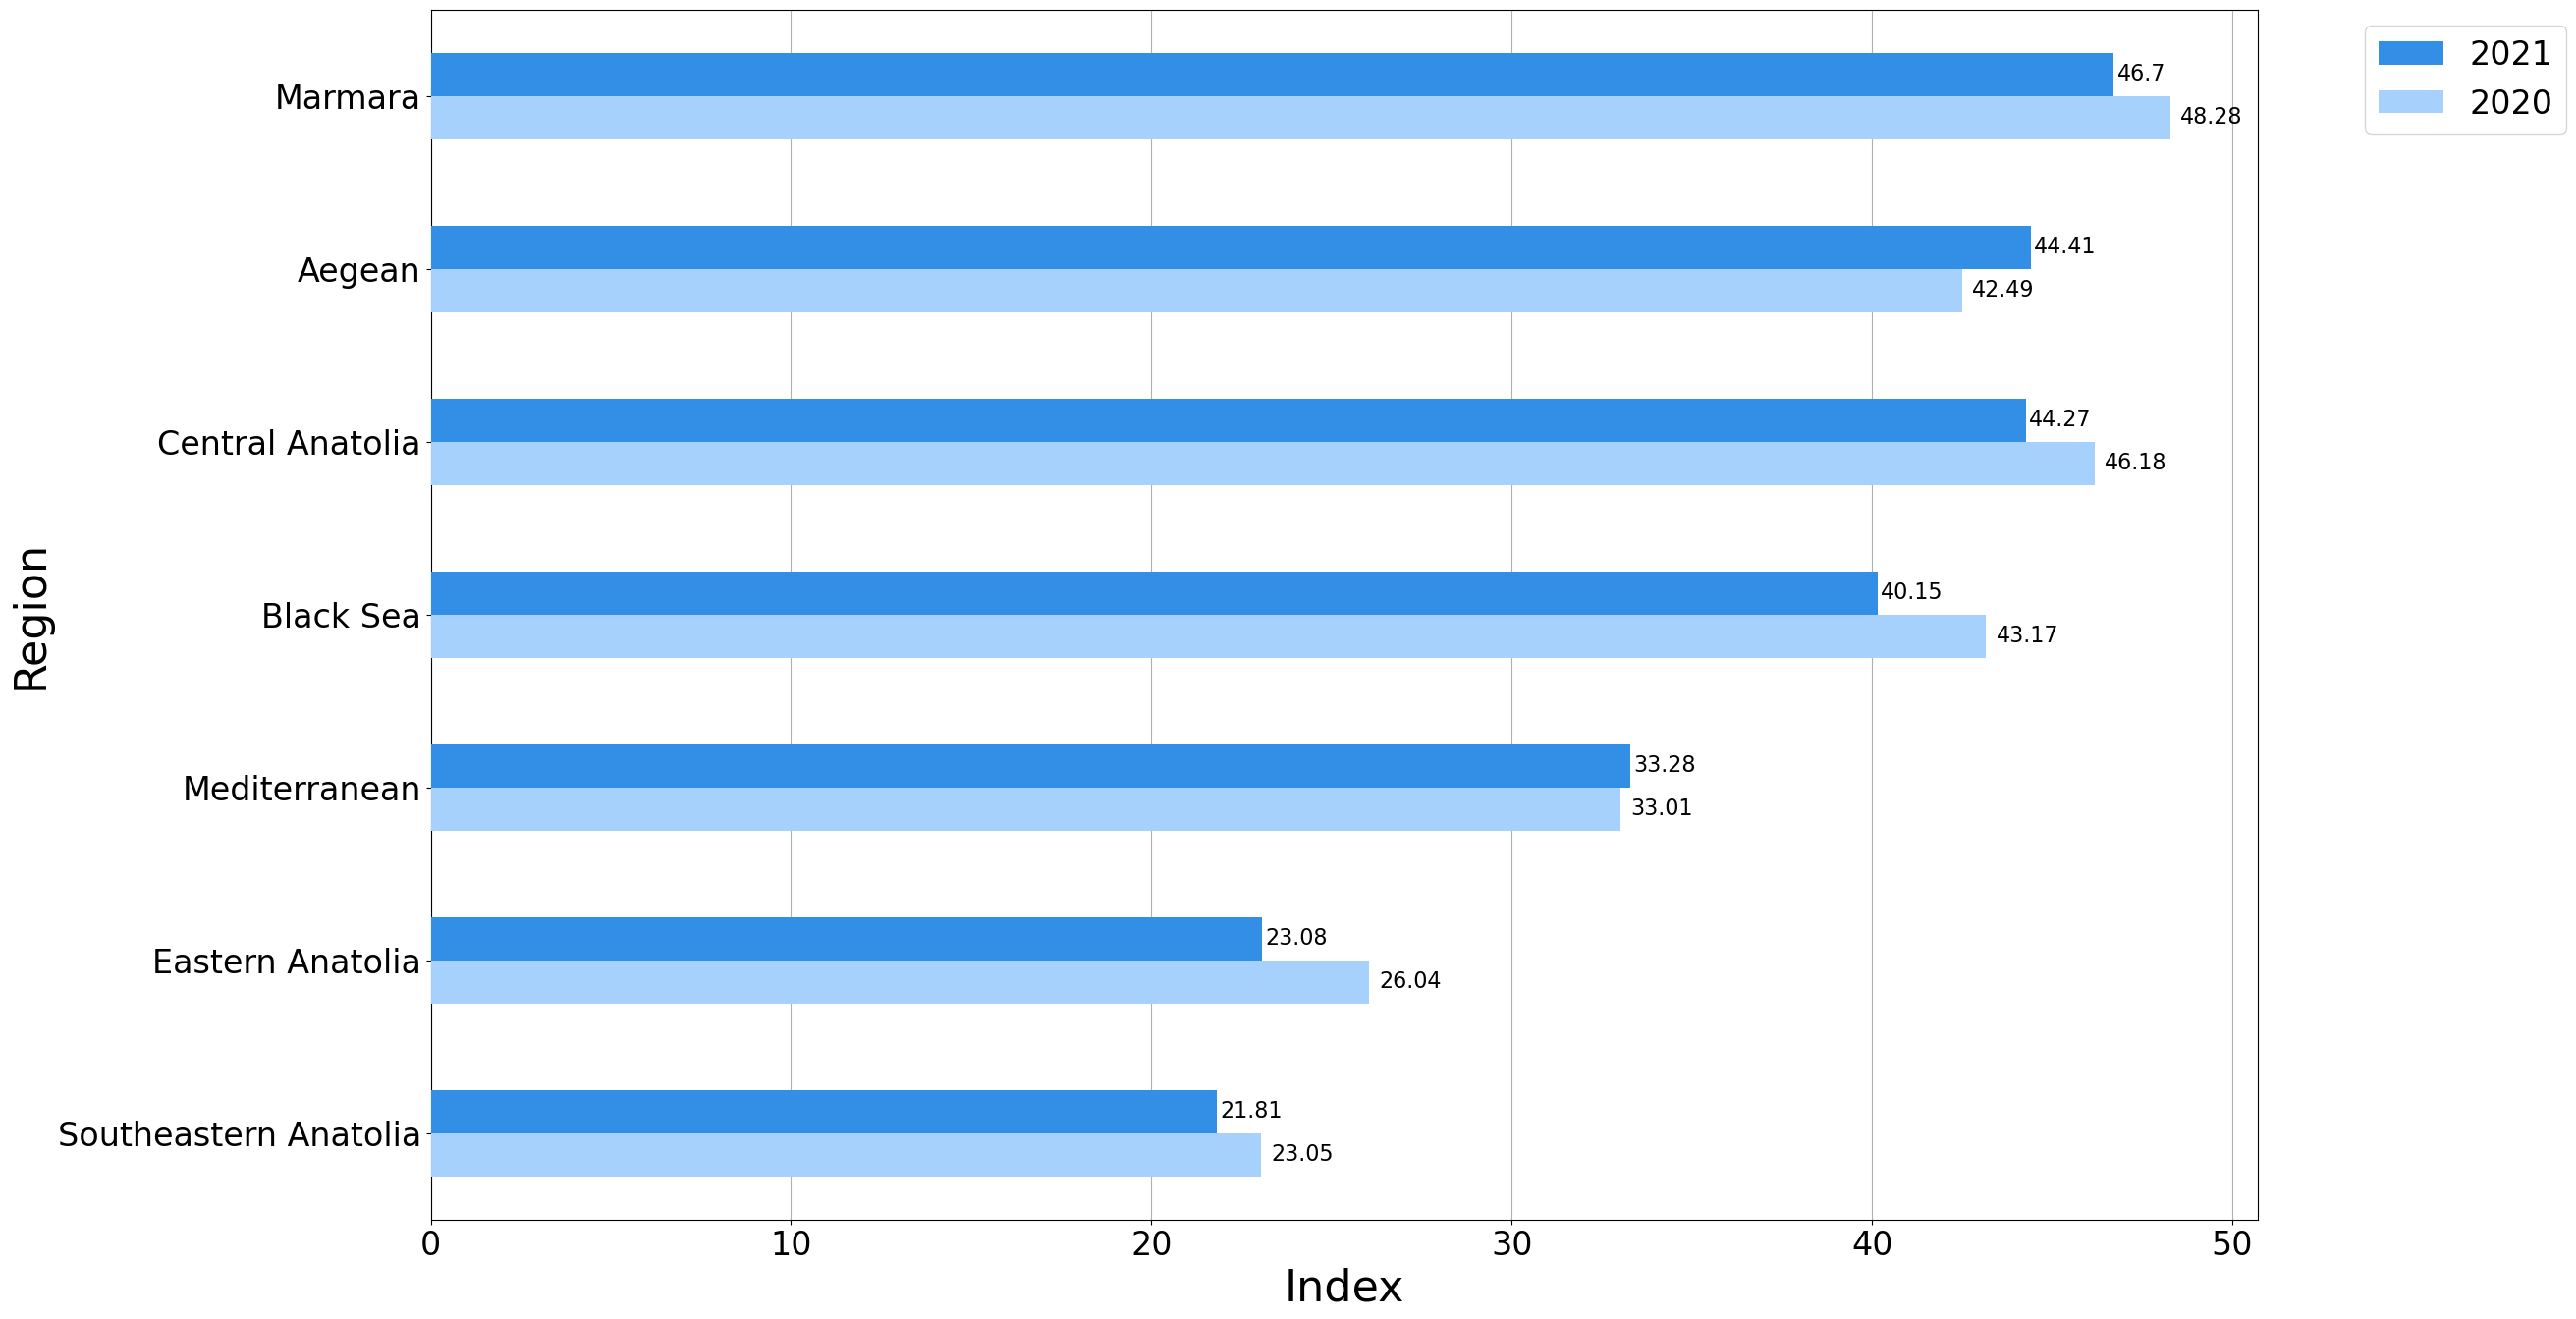

In [55]:
blue_1 = (0.2, 0.56,0.90)
blue_2 = (0.65, 0.82, 0.99)


ax = region_merged.plot(kind='barh', x='Region',
                        color=[blue_2, blue_1], figsize=(24,16),
                       zorder=5, fontsize=24)

ax.grid(axis='x', zorder=0)
ax.bar_label(ax.containers[0], padding=7.5, fontsize=16)
ax.bar_label(ax.containers[1], padding=2.5, fontsize=16)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], 
          bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=24)

ax.set_xlabel(xlabel='Index', fontsize=32)
ax.set_ylabel(ylabel='Region', fontsize=32)


### Top 10 positions for 2020

In [56]:
df_data_2020[columns].sort_values(by='Rank').head(10)

,Province,Rank,Index,Culture,Education,Healthcare,Economy,NaturalDisasters
24,Edirne,1,84.19,100.00,74.05,100.00,63.68,-10.90
28,Eskişehir,2,63.95,71.71,50.68,74.11,75.33,-25.75
5,Ankara,3,63.78,60.21,41.26,88.93,85.73,-30.70
18,Bolu,4,60.65,62.85,56.18,90.12,74.27,-50.50
77,İstanbul,5,56.37,80.83,7.47,58.24,100.00,-30.70
55,Nevşehir,6,56.27,77.37,87.02,18.26,53.58,-20.80
34,Isparta,7,56.05,39.22,80.31,92.03,53.52,-50.50
46,Kırklareli,8,55.16,49.09,53.15,31.89,77.88,-1.00
31,Gümüşhane,9,55.14,64.99,81.28,38.81,51.59,-25.75
8,Artvin,10,53.88,51.35,80.27,29.85,60.31,-15.85


### Bottom 10 positions for 2020

In [57]:
df_data_2020[columns].sort_values(by='Rank').tail(10)

,Province,Rank,Index,Culture,Education,Healthcare,Economy,NaturalDisasters
17,Bitlis,72,19.84,24.32,41.63,27.02,37.51,-60.40
62,Siirt,73,19.51,19.10,30.63,15.23,49.35,-45.55
58,Osmaniye,74,18.76,16.84,25.17,19.18,50.16,-45.55
79,Şanlıurfa,75,17.71,21.49,4.48,8.64,47.79,-20.80
36,Kahramanmaraş,76,17.13,19.04,14.70,25.90,55.08,-55.45
1,Adıyaman,77,15.02,8.48,31.97,23.33,37.57,-50.50
10,Ağrı,78,14.58,11.87,26.47,2.19,44.24,-35.65
70,Van,79,12.64,21.37,20.53,24.32,40.50,-65.35
32,Hakkari,80,3.94,1.00,22.63,4.62,28.91,-50.50
80,Şırnak,81,0.00,1.00,18.63,1.00,1.00,-30.70


### Regions 2020

Text(0, 0.5, 'Region')

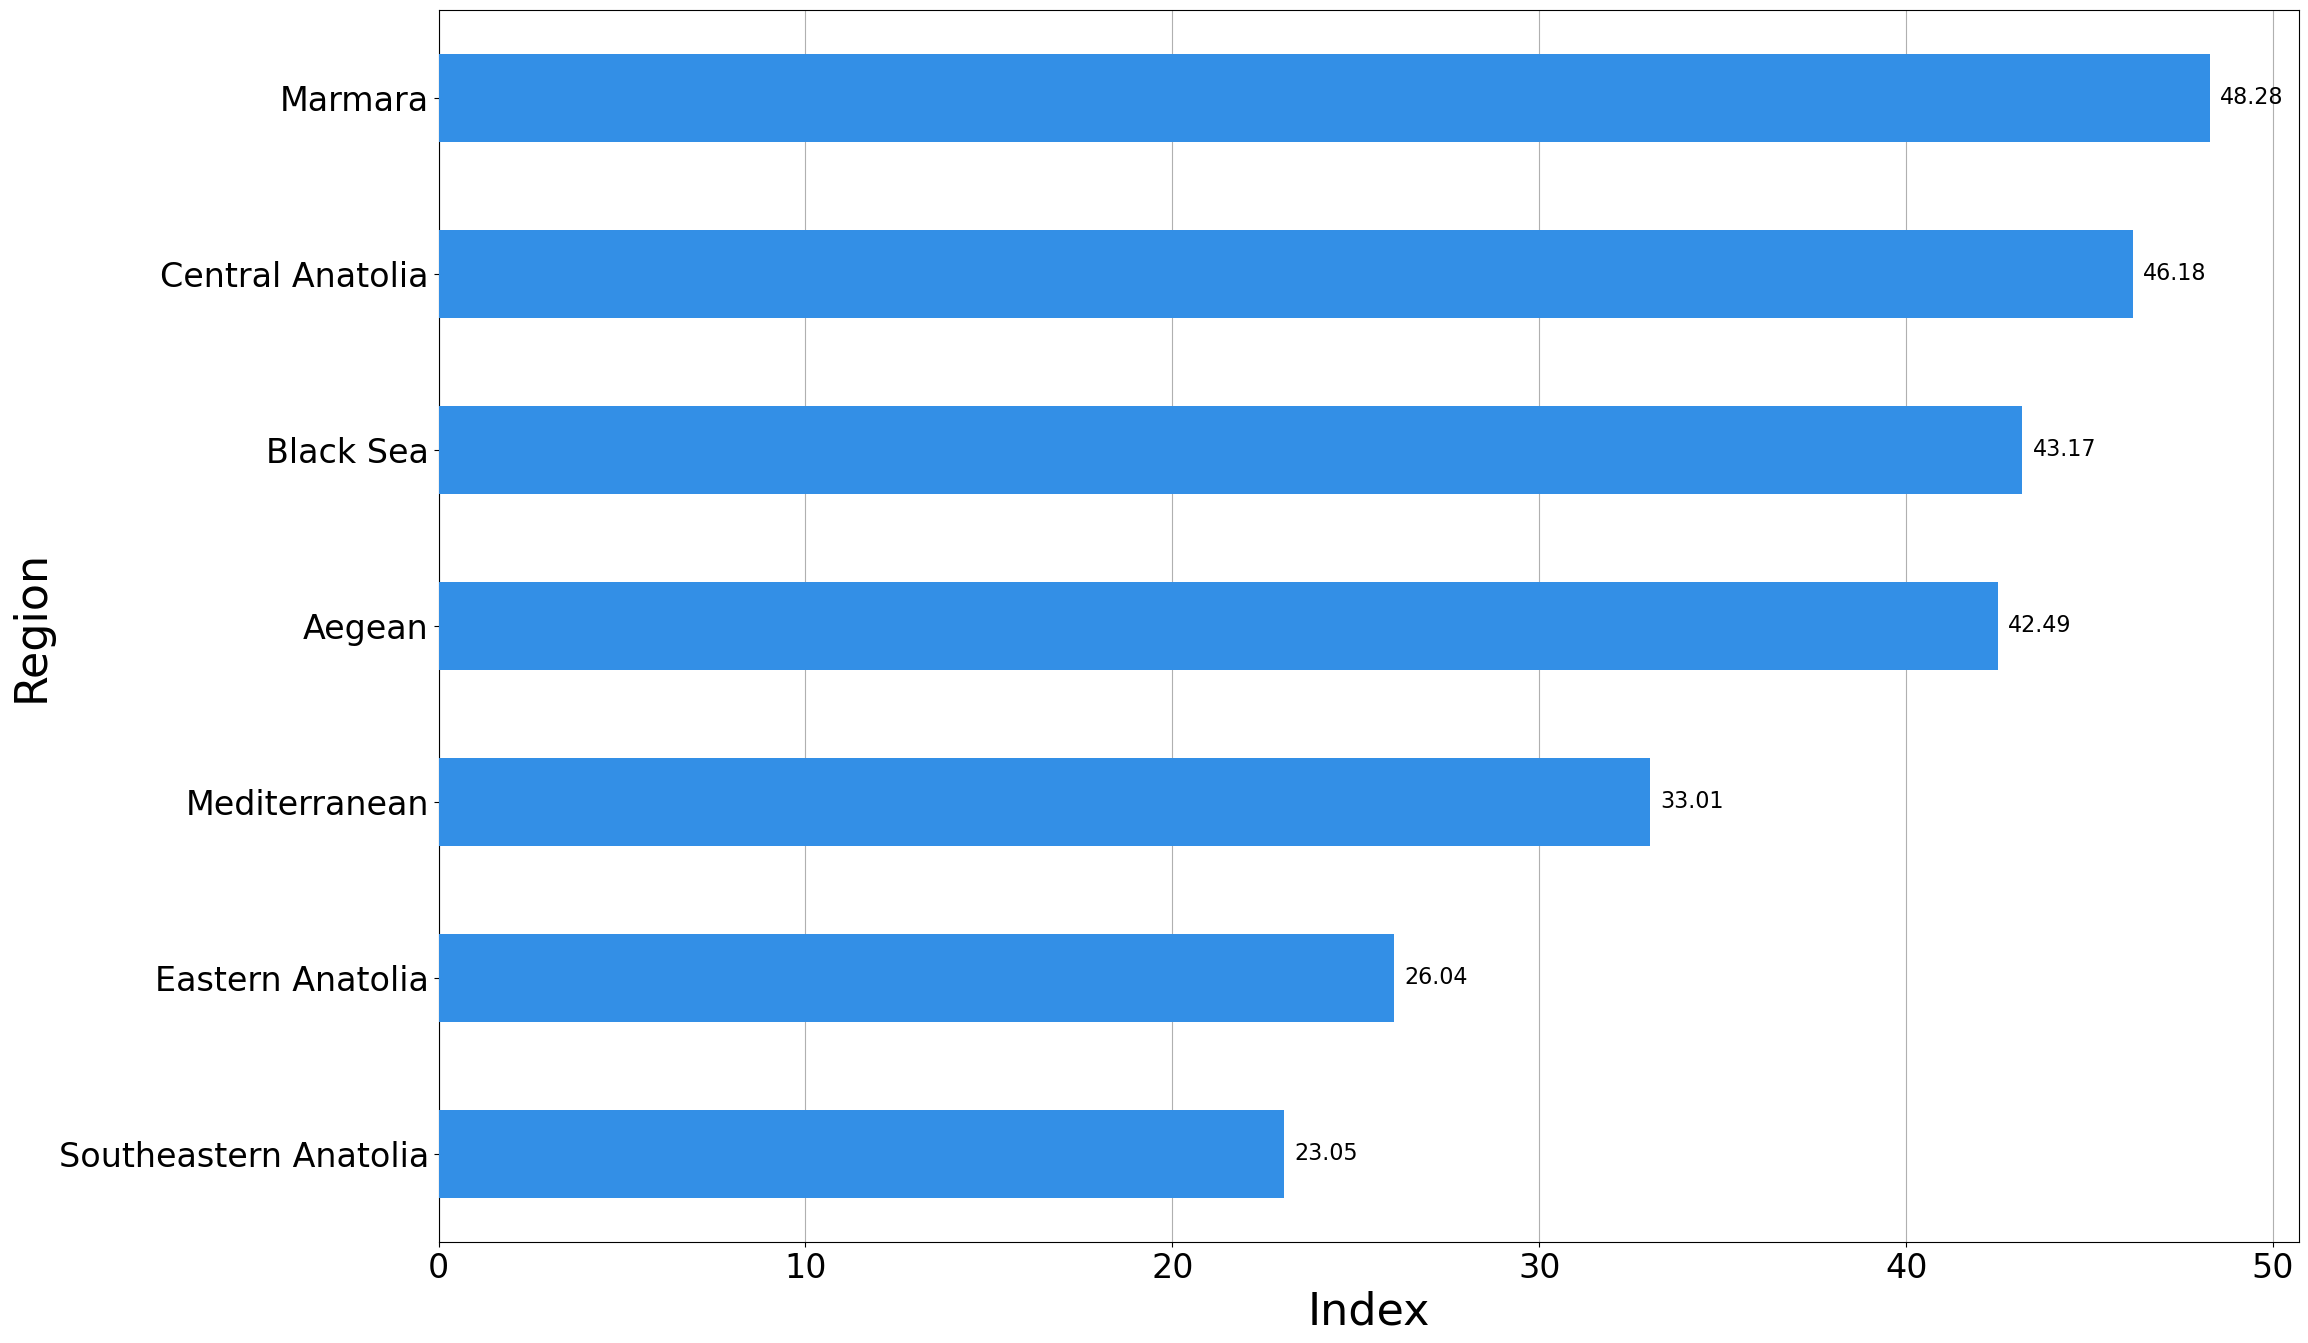

In [61]:
df_regions_2020 = df_data_2020.groupby(['Region'])[['Region', 'Index']].mean(numeric_only=True).reset_index().round(2)

fig, ax2 = plt.subplots()
df_regions_2020.sort_values(by=['Index']).plot(ax=ax2 ,kind='barh',
                                                x='Region', y='Index', color=(0.2, 0.56,0.90),
                                                figsize=(24,16), legend=False, zorder=5, fontsize=24)
ax2.grid(axis='x', zorder=0)
ax2.bar_label(ax2.containers[0], padding=7.5, fontsize=16)
ax2.set_xlabel(xlabel='Index', fontsize=32)
ax2.set_ylabel(ylabel='Region', fontsize=32)                                                                               

In [62]:
df_data_2020.groupby(['Region'])[['Region', 'Index', 'Culture', 'Education', 'Healthcare', 'NaturalDisasters', 'Economy']].mean(numeric_only=True).reset_index().round(2).sort_values(by='Index', ascending=False)

,Region,Index,Culture,Education,Healthcare,NaturalDisasters,Economy
4,Marmara,48.28,60.07,40.15,40.61,-36.10,78.85
2,Central Anatolia,46.18,44.19,57.45,43.80,-32.22,61.96
1,Black Sea,43.17,46.17,61.92,45.03,-43.35,53.42
0,Aegean,42.49,50.93,49.10,42.13,-47.41,65.73
5,Mediterranean,33.01,35.53,37.15,41.18,-49.26,58.06
3,Eastern Anatolia,26.04,27.77,45.42,30.10,-53.47,45.00
6,Southeastern Anatolia,23.05,23.87,17.99,23.97,-28.22,45.28


In [63]:
region_20 = df_data_2020.groupby(['Region'])[['Region', 'Index']].mean(numeric_only=True).reset_index().round(2)
region_19 = df_data_2019.groupby(['Region'])[['Region', 'Index']].mean(numeric_only=True).reset_index().round(2)

region_merged = pd.merge(region_19, region_20, on='Region')
region_merged.columns = ['Region', '2019', '2020']
region_merged.sort_values(by='2020',ascending=True, inplace=True)
region_merged

,Region,2019,2020
6,Southeastern Anatolia,22.55,23.05
3,Eastern Anatolia,25.62,26.04
5,Mediterranean,33.25,33.01
0,Aegean,42.76,42.49
1,Black Sea,42.46,43.17
2,Central Anatolia,43.78,46.18
4,Marmara,46.48,48.28


Text(0, 0.5, 'Region')

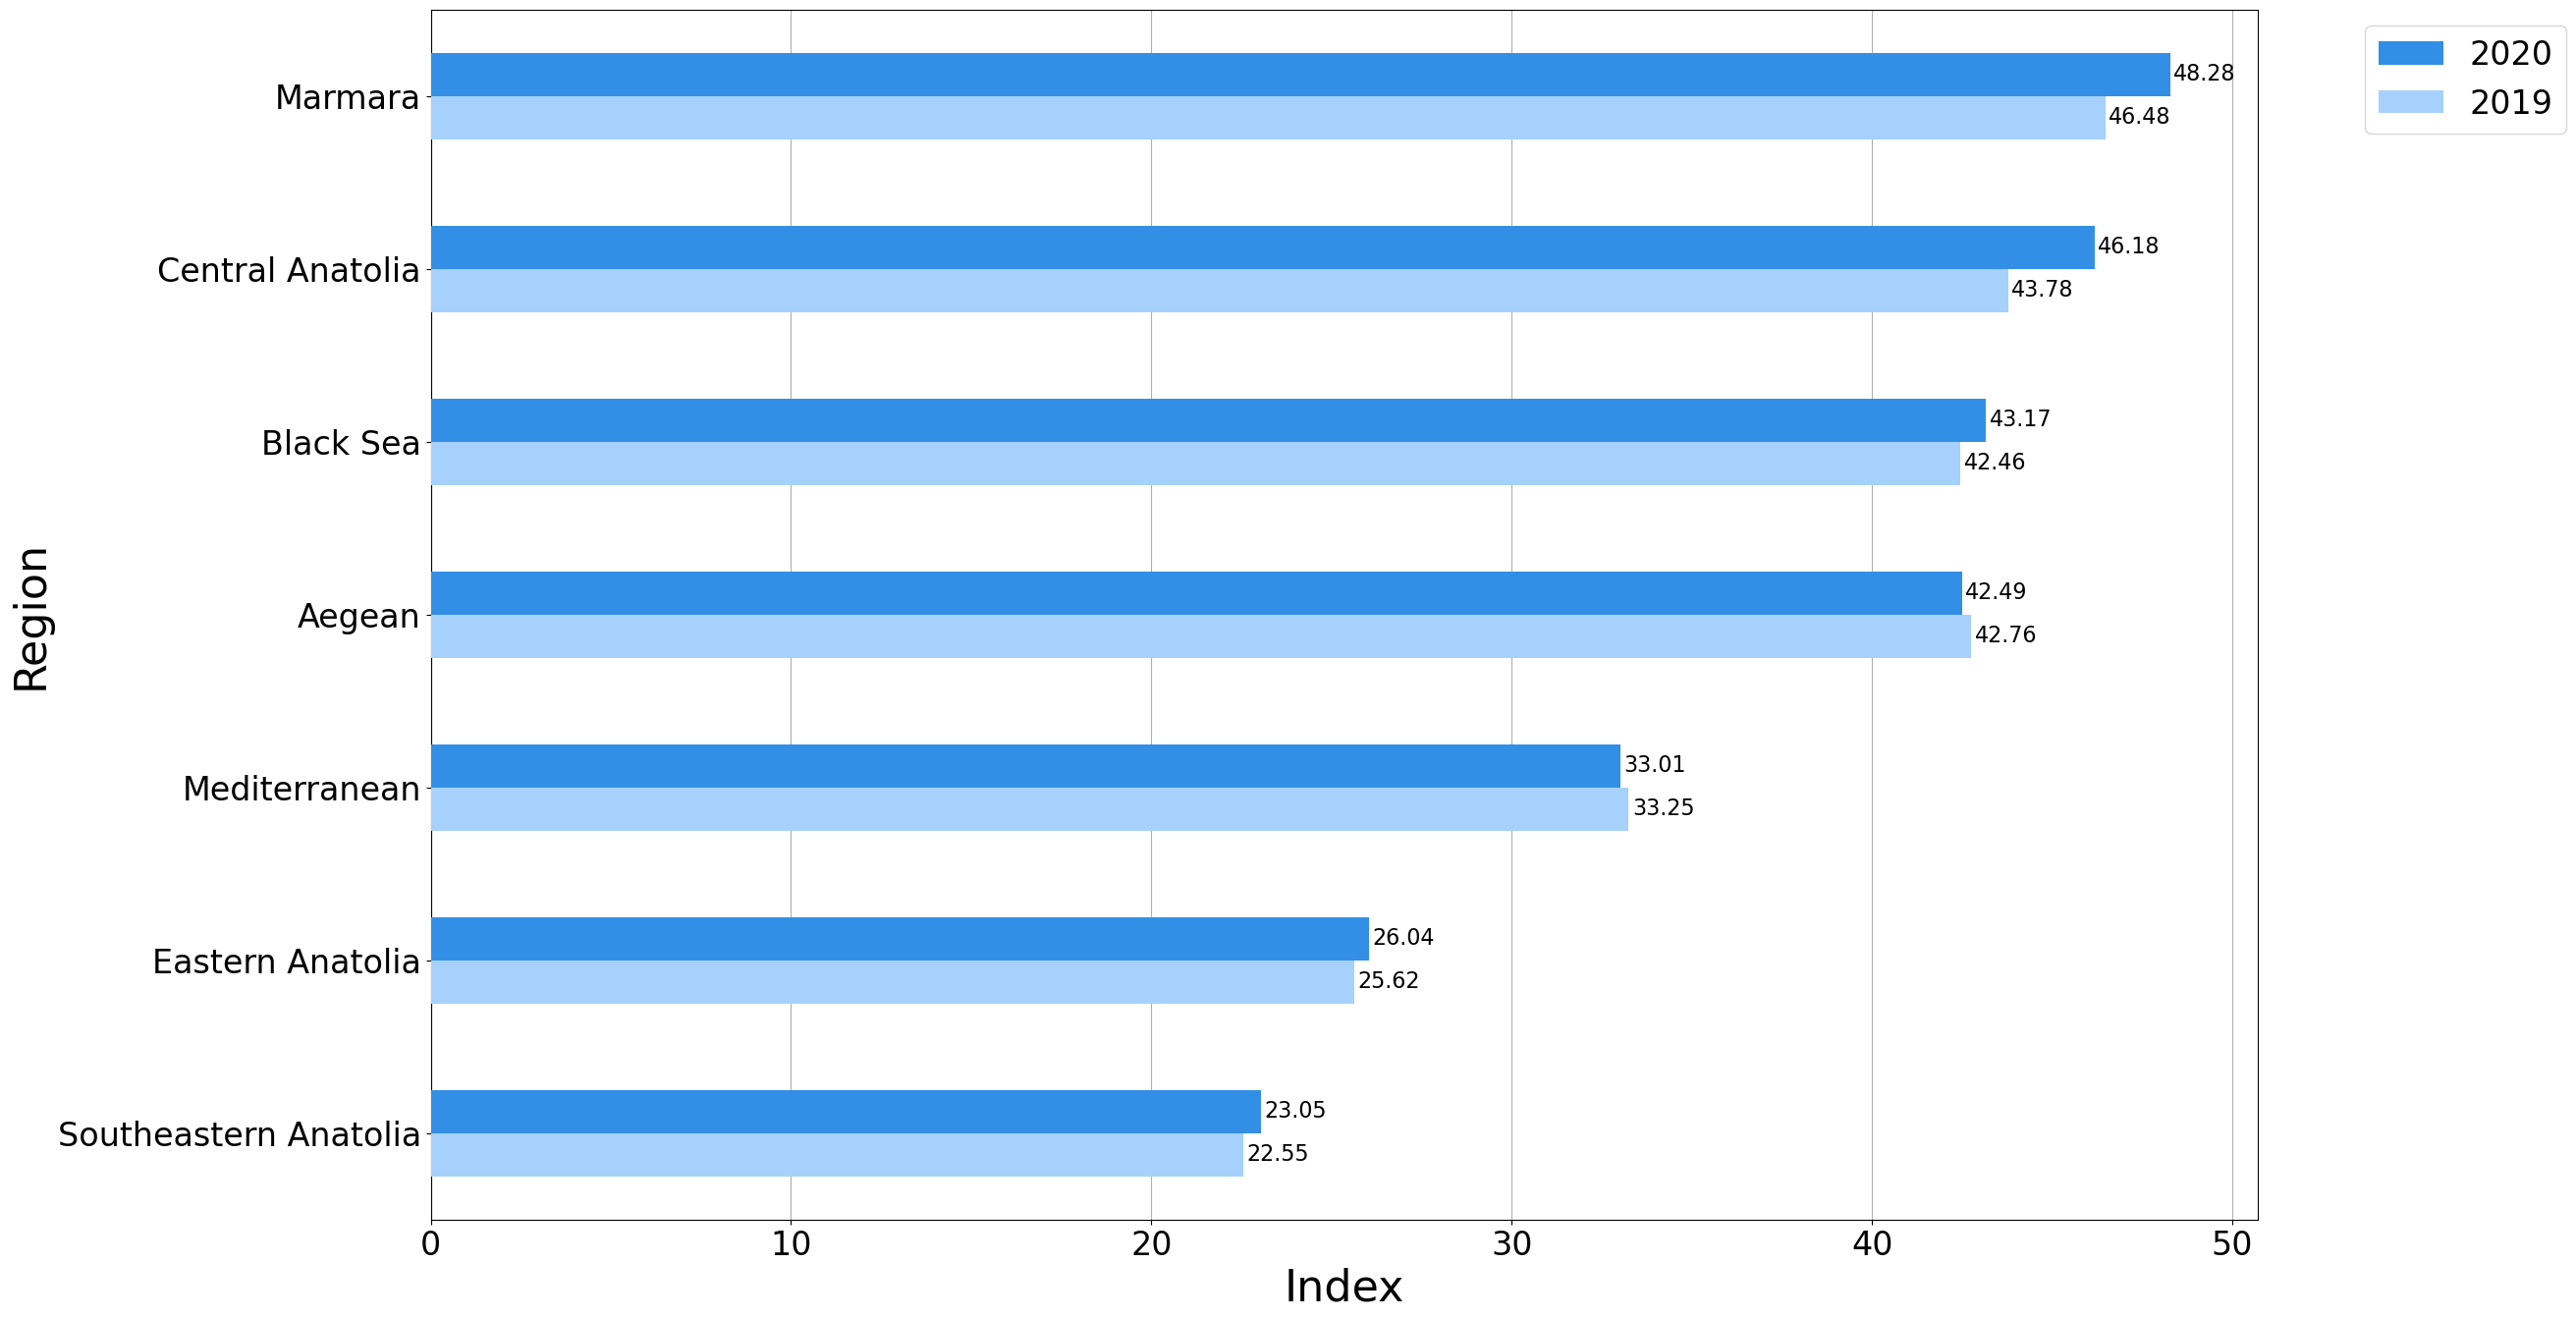

In [64]:
ax = region_merged.plot(kind='barh', x='Region',
                        color=[blue_2, blue_1], figsize=(24,16),
                       zorder=5, fontsize=24)

ax.grid(axis='x', zorder=0)
ax.bar_label(ax.containers[0], padding=2.5, fontsize=16)
ax.bar_label(ax.containers[1], padding=2.5, fontsize=16)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], 
          bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=24)

ax.set_xlabel(xlabel='Index', fontsize=32)
ax.set_ylabel(ylabel='Region', fontsize=32)

### Top 10 positions for 2019

In [65]:
df_data_2019[columns].sort_values(by='Rank').head(10)

,Province,Rank,Index,Culture,Education,Healthcare,Economy,NaturalDisasters
24,Edirne,1,80.48,91.72,71.88,100.00,63.61,-10.90
18,Bolu,2,61.60,78.92,58.07,83.50,70.99,-50.50
8,Artvin,3,61.31,100.00,76.25,28.40,51.03,-15.85
5,Ankara,4,61.07,63.01,39.18,84.90,82.46,-30.70
28,Eskişehir,5,60.15,68.25,47.35,71.38,73.96,-25.75
46,Kırklareli,6,54.10,55.38,53.74,27.61,75.33,-1.00
77,İstanbul,7,53.35,83.12,5.70,49.95,100.00,-30.70
34,Isparta,8,53.28,40.38,81.61,87.58,48.73,-50.50
55,Nevşehir,9,53.10,63.59,86.72,21.94,55.61,-20.80
78,İzmir,10,51.88,76.98,34.52,62.92,78.30,-50.50


### Bottom 10 positions for 2019

In [66]:
df_data_2019[columns].sort_values(by='Rank').tail(10)

,Province,Rank,Index,Culture,Education,Healthcare,Economy,NaturalDisasters
79,Şanlıurfa,72,19.63,20.92,10.44,13.97,48.98,-20.80
10,Ağrı,73,19.53,33.33,27.27,4.77,43.40,-35.65
58,Osmaniye,74,19.07,21.50,24.87,23.35,47.12,-45.55
62,Siirt,75,18.97,7.98,32.96,26.21,49.29,-45.55
54,Muş,76,17.53,45.49,34.69,10.74,24.74,-50.50
36,Kahramanmaraş,77,17.32,19.17,14.52,30.65,55.43,-55.45
1,Adıyaman,78,15.80,12.83,35.51,25.17,35.22,-50.50
70,Van,79,12.94,16.20,24.26,29.62,42.10,-65.35
80,Şırnak,80,1.66,8.95,21.58,1.00,1.00,-30.70
32,Hakkari,81,0.00,1.00,19.51,7.45,17.74,-50.50


### Regions 2019

Text(0, 0.5, 'Region')

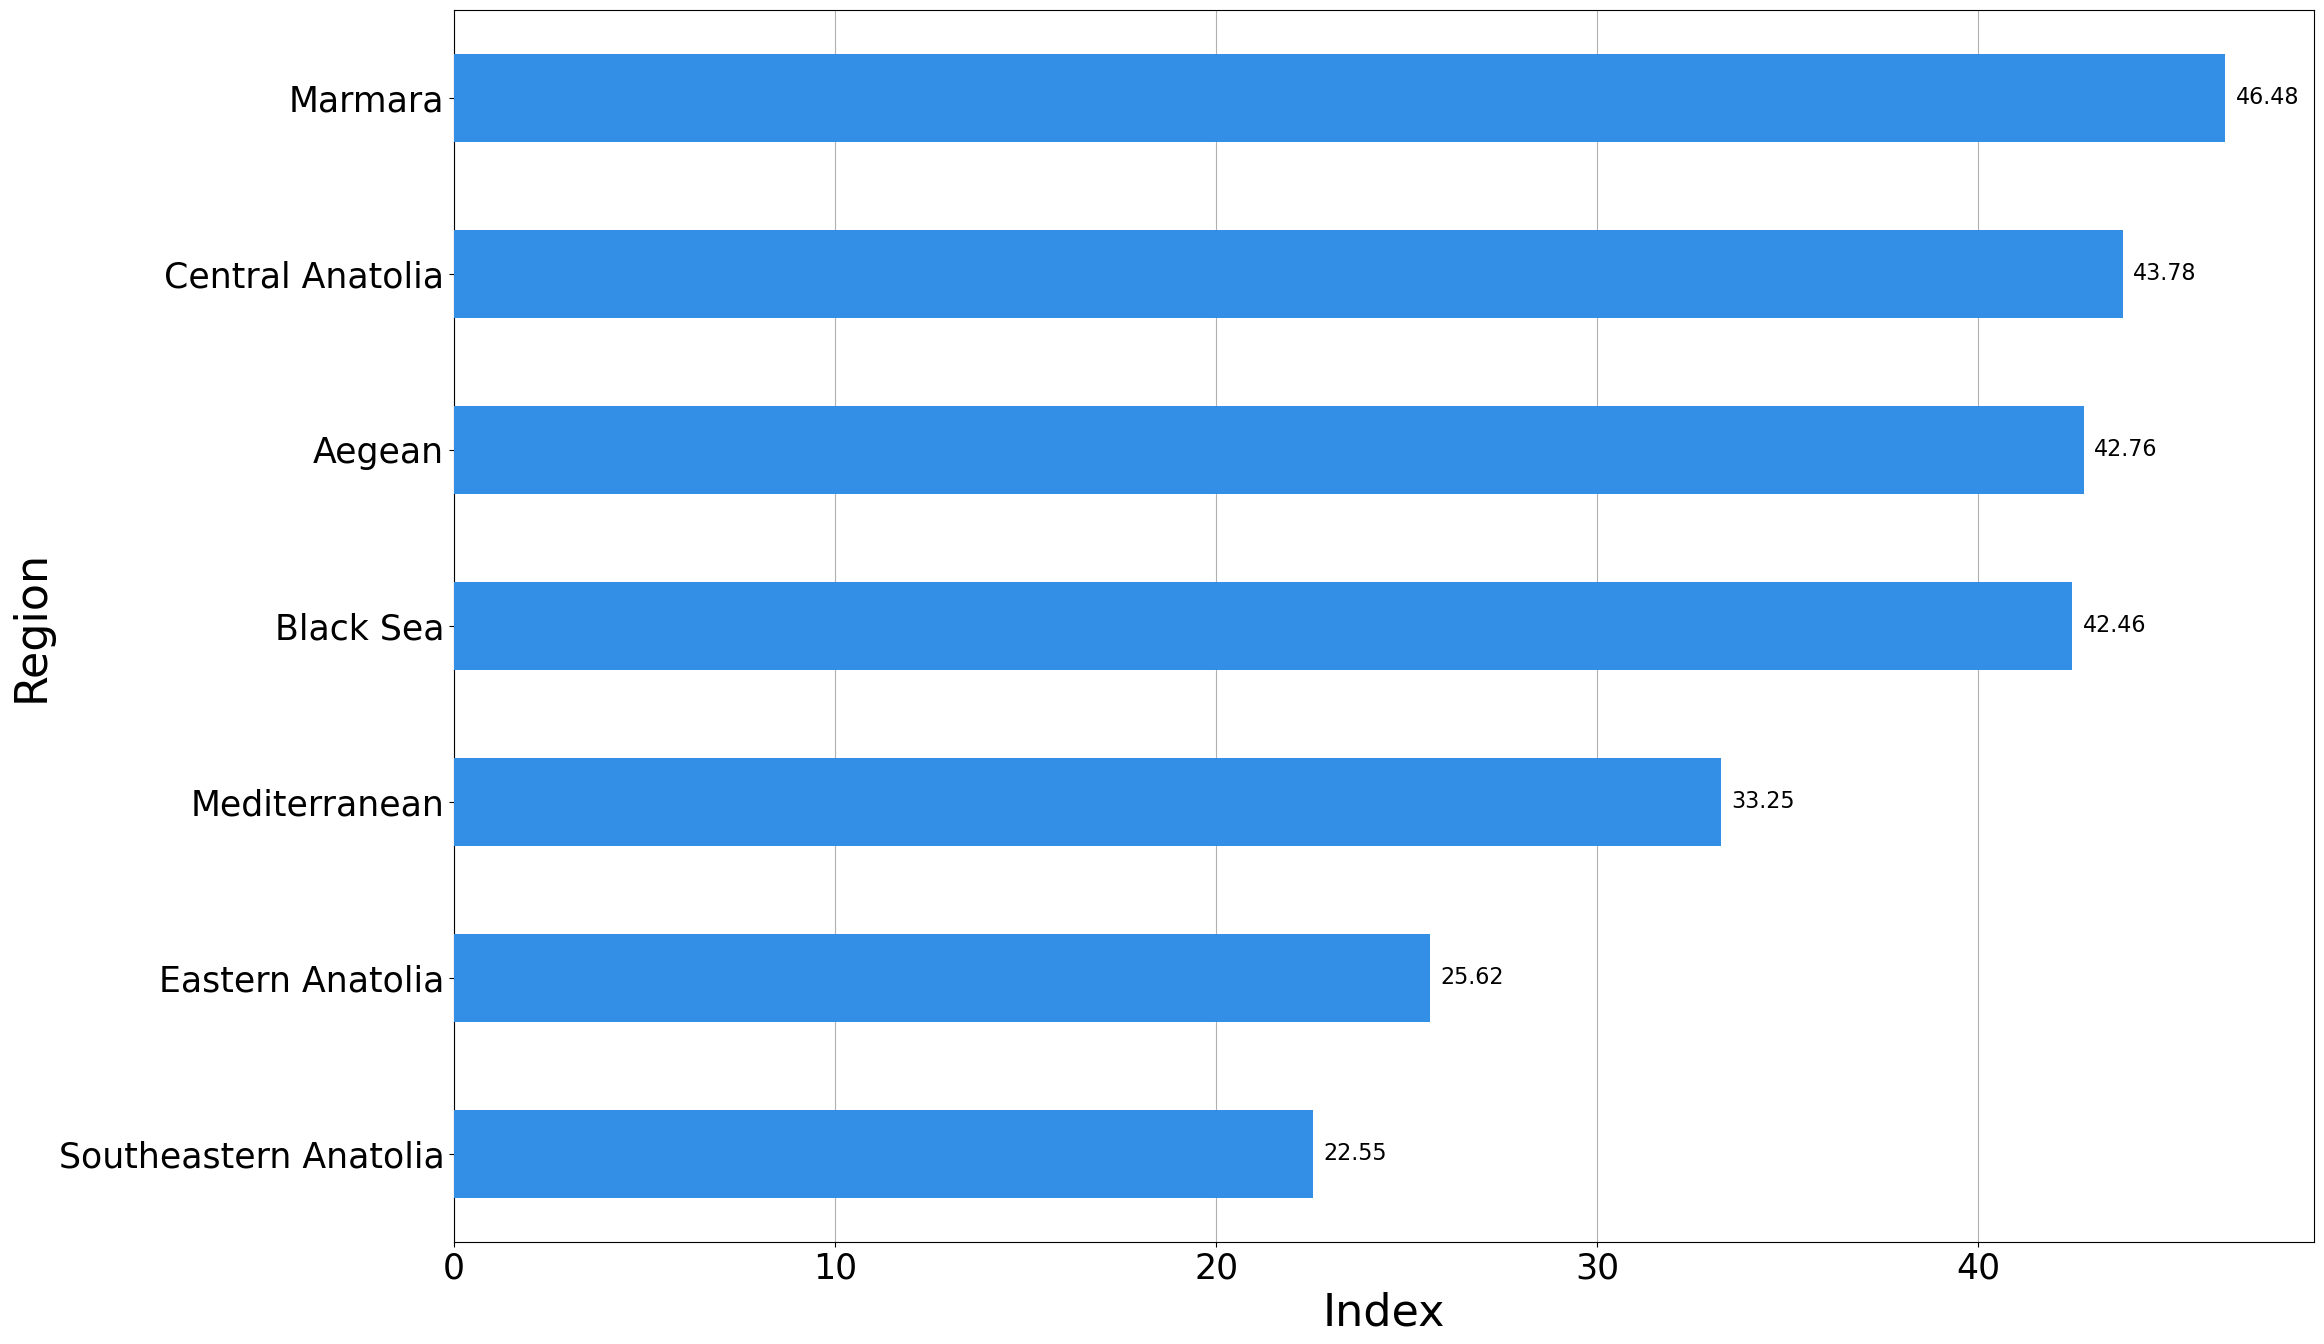

In [67]:
df_regions_2019 = df_data_2019.groupby(['Region'])[['Region', 'Index']].mean(numeric_only=True).reset_index().round(2)

fig, ax2 = plt.subplots()
df_regions_2019.sort_values(by=['Index']).plot(ax=ax2 ,kind='barh',
                                                x='Region', y='Index', color=(0.2, 0.56,0.90),
                                                figsize=(24,16), legend=False, zorder=5, fontsize=25)
ax2.grid(axis='x', zorder=0)
ax2.bar_label(ax2.containers[0], padding=7.5, fontsize=16)
ax2.set_xlabel(xlabel='Index', fontsize=32)
ax2.set_ylabel(ylabel='Region', fontsize=32)                                                                               

In [68]:
df_data_2019.groupby(['Region'])[['Region', 'Index', 'Culture', 'Education', 'Healthcare', 'NaturalDisasters', 'Economy']].mean(numeric_only=True).reset_index().round(2).sort_values(by='Index', ascending=False)

,Region,Index,Culture,Education,Healthcare,NaturalDisasters,Economy
4,Marmara,46.48,61.55,40.32,38.19,-36.10,76.68
2,Central Anatolia,43.78,42.47,55.84,44.35,-32.22,59.46
0,Aegean,42.76,53.84,49.99,44.44,-47.41,64.97
1,Black Sea,42.46,54.58,60.06,42.11,-43.35,51.23
5,Mediterranean,33.25,38.00,37.92,43.17,-49.26,58.04
3,Eastern Anatolia,25.62,30.97,46.79,31.58,-53.47,41.57
6,Southeastern Anatolia,22.55,23.11,19.68,25.50,-28.22,45.11


In [69]:
region_19 = df_data_2019.groupby(['Region'])[['Region', 'Index']].mean(numeric_only=True).reset_index().round(2)
region_18 = df_data_2018.groupby(['Region'])[['Region', 'Index']].mean(numeric_only=True).reset_index().round(2)

region_merged = pd.merge(region_18, region_19, on='Region')
region_merged.columns = ['Region', '2018', '2019']
region_merged.sort_values(by='2019',ascending=True, inplace=True)
region_merged

,Region,2018,2019
6,Southeastern Anatolia,23.53,22.55
3,Eastern Anatolia,24.44,25.62
5,Mediterranean,34.91,33.25
1,Black Sea,41.21,42.46
0,Aegean,44.31,42.76
2,Central Anatolia,45.20,43.78
4,Marmara,48.16,46.48


Text(0, 0.5, 'Region')

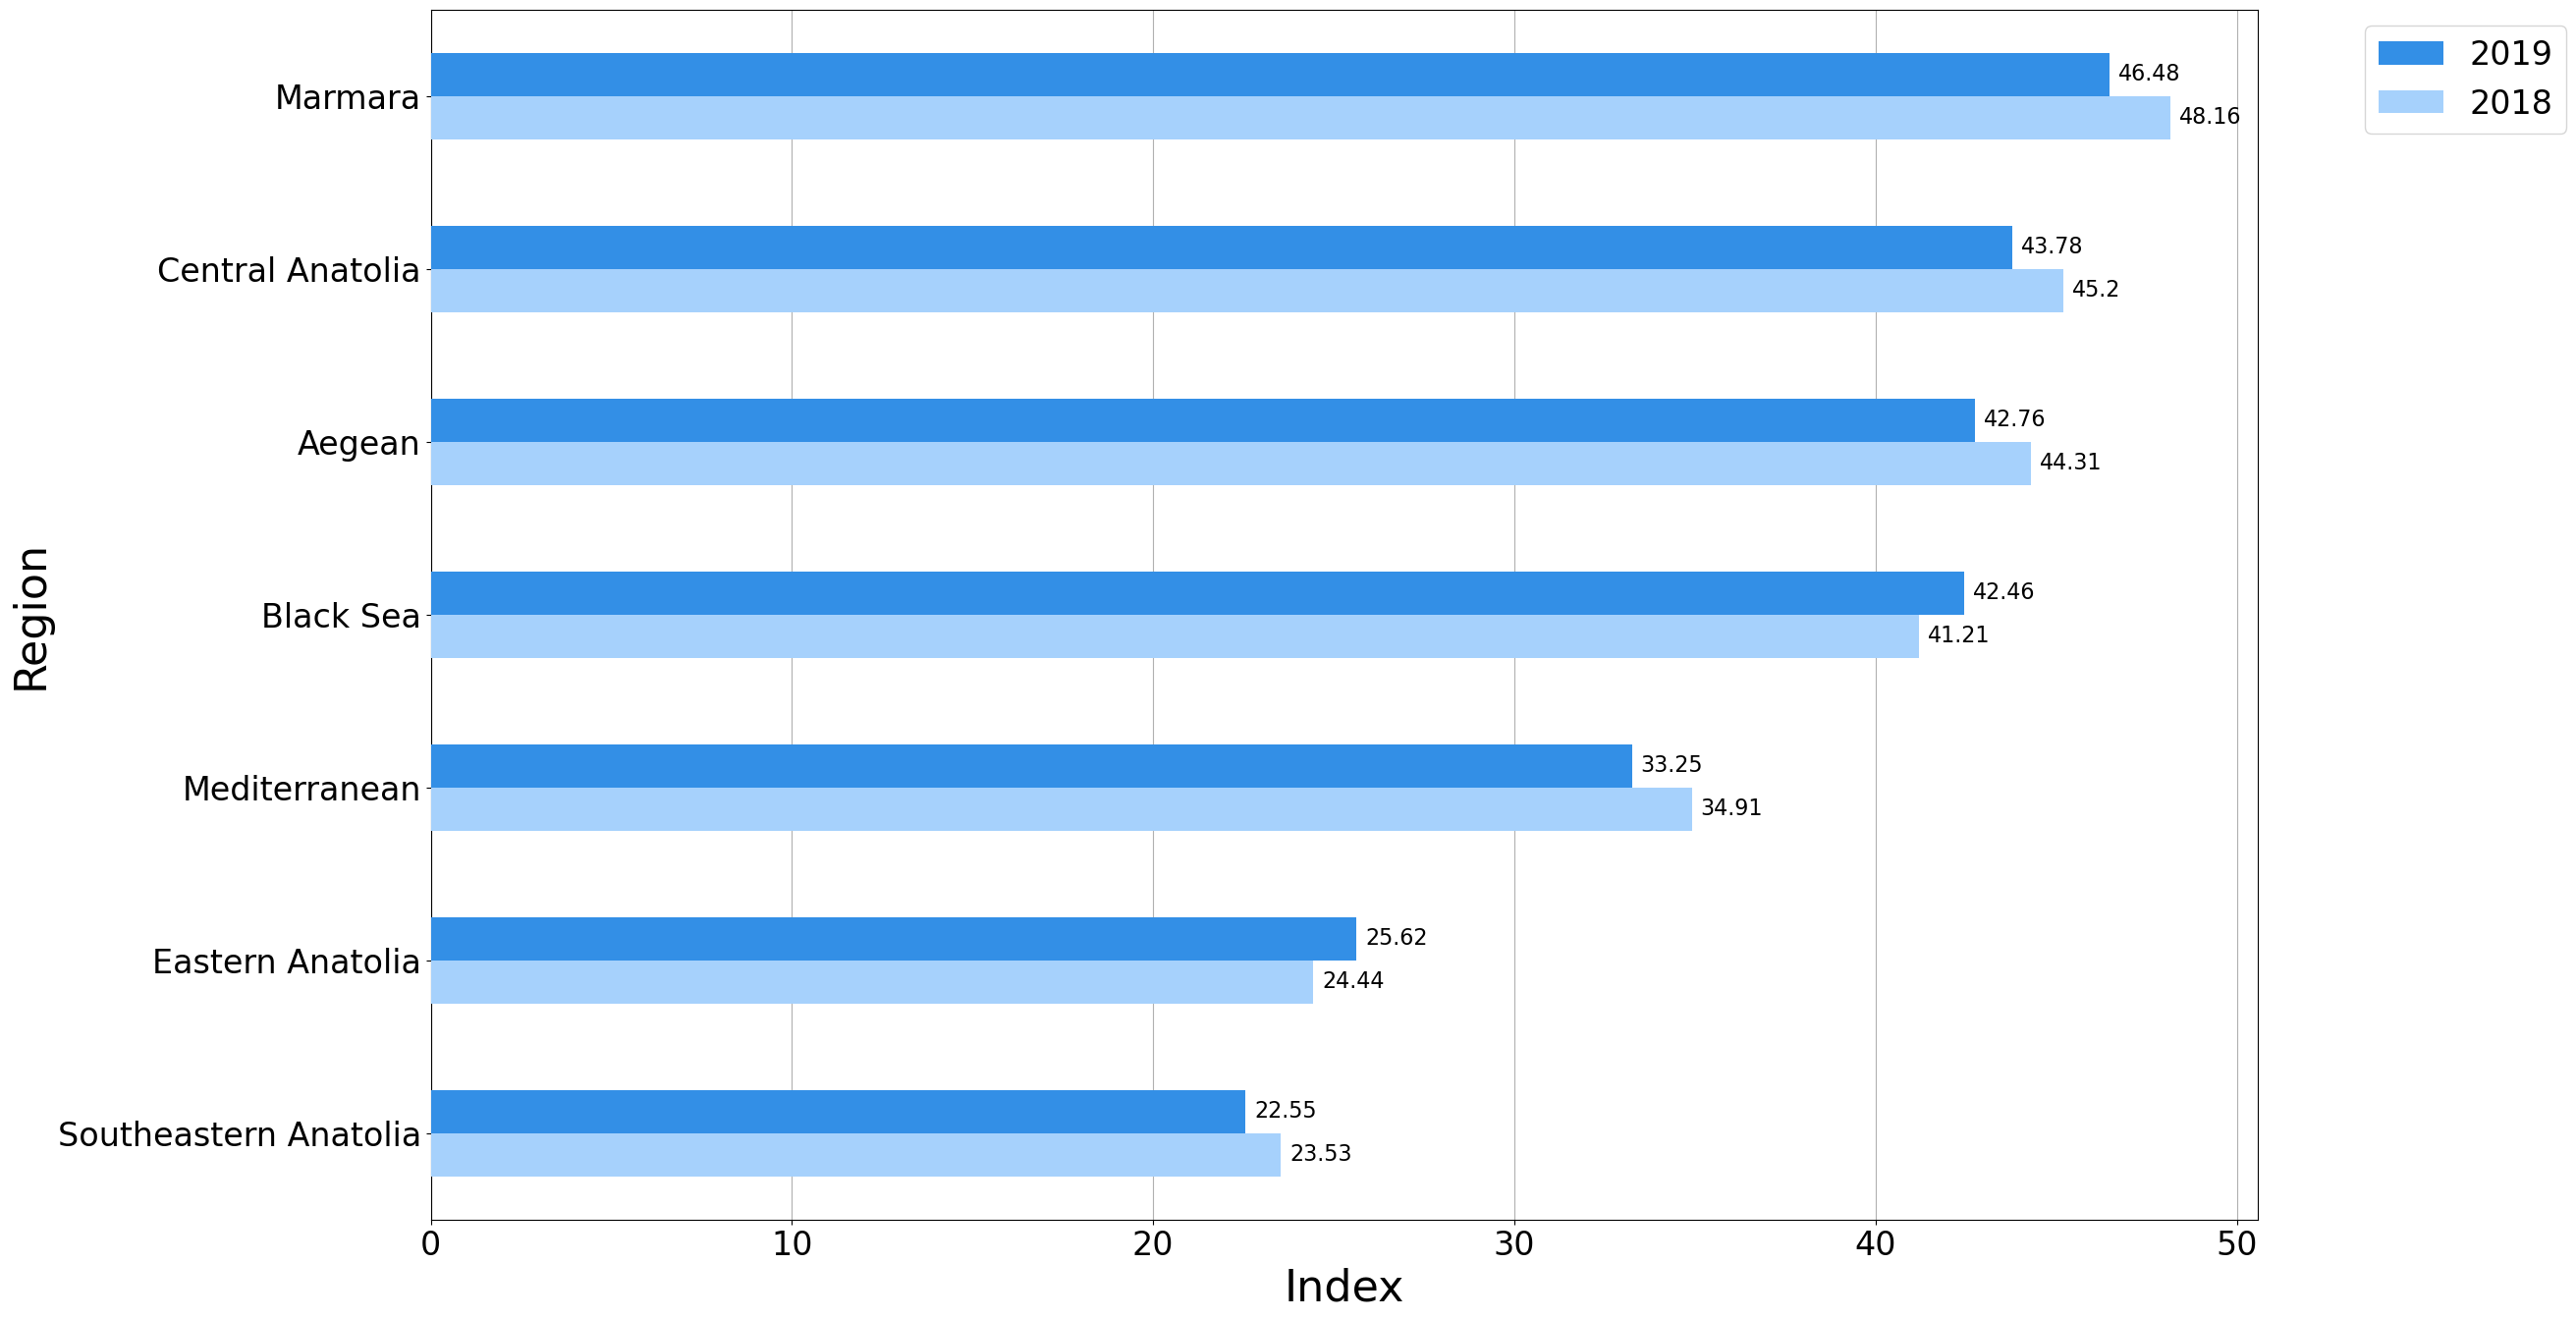

In [70]:
ax = region_merged.plot(kind='barh', x='Region',
                        color=[blue_2, blue_1], figsize=(24,16),
                       zorder=5, fontsize=24)

ax.grid(axis='x', zorder=0)
ax.bar_label(ax.containers[0], padding=6.5, fontsize=16)
ax.bar_label(ax.containers[1], padding=6.5, fontsize=16)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], 
          bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=24)

ax.set_xlabel(xlabel='Index', fontsize=32)
ax.set_ylabel(ylabel='Region', fontsize=32)

### Top 10 positions for 2018

In [71]:
df_data_2018[columns].sort_values(by='Rank').head(10)

,Province,Rank,Index,Culture,Education,Healthcare,Economy,NaturalDisasters
24,Edirne,1,84.63,100.00,71.87,100.00,60.99,-10.90
18,Bolu,2,64.81,78.80,56.67,86.52,71.40,-50.50
28,Eskişehir,3,62.63,64.24,48.19,73.57,73.93,-25.75
5,Ankara,4,62.10,58.33,41.19,83.34,79.88,-30.70
55,Nevşehir,5,57.63,66.86,90.79,24.43,52.95,-20.80
77,İstanbul,6,57.00,81.11,7.96,53.33,100.00,-30.70
46,Kırklareli,7,55.69,47.61,53.19,31.78,74.92,-1.00
34,Isparta,8,55.50,40.66,78.49,88.23,48.86,-50.50
78,İzmir,9,54.16,68.62,36.94,65.69,79.63,-50.50
74,Çanakkale,10,51.96,54.00,58.63,52.21,67.37,-40.60


### Bottom 10 positions for 2018

In [72]:
df_data_2018[columns].sort_values(by='Rank').tail(10)


,Province,Rank,Index,Culture,Education,Healthcare,Economy,NaturalDisasters
54,Muş,72,19.97,49.43,33.00,9.48,22.55,-50.50
1,Adıyaman,73,19.82,16.78,35.58,25.96,35.55,-50.50
13,Batman,74,19.74,7.34,22.73,22.07,36.66,-25.75
36,Kahramanmaraş,75,19.31,20.68,9.23,32.61,54.25,-55.45
16,Bingöl,76,17.32,39.08,49.33,23.43,21.74,-80.20
10,Ağrı,77,17.14,12.15,25.61,6.94,43.60,-35.65
17,Bitlis,78,13.32,4.96,41.78,27.43,23.66,-60.40
70,Van,79,12.08,8.19,17.89,30.08,41.68,-65.35
80,Şırnak,80,1.13,2.52,14.96,1.00,1.00,-30.70
32,Hakkari,81,0.00,1.00,17.17,5.89,10.72,-50.50


### Regions 2018

Text(0, 0.5, 'Region')

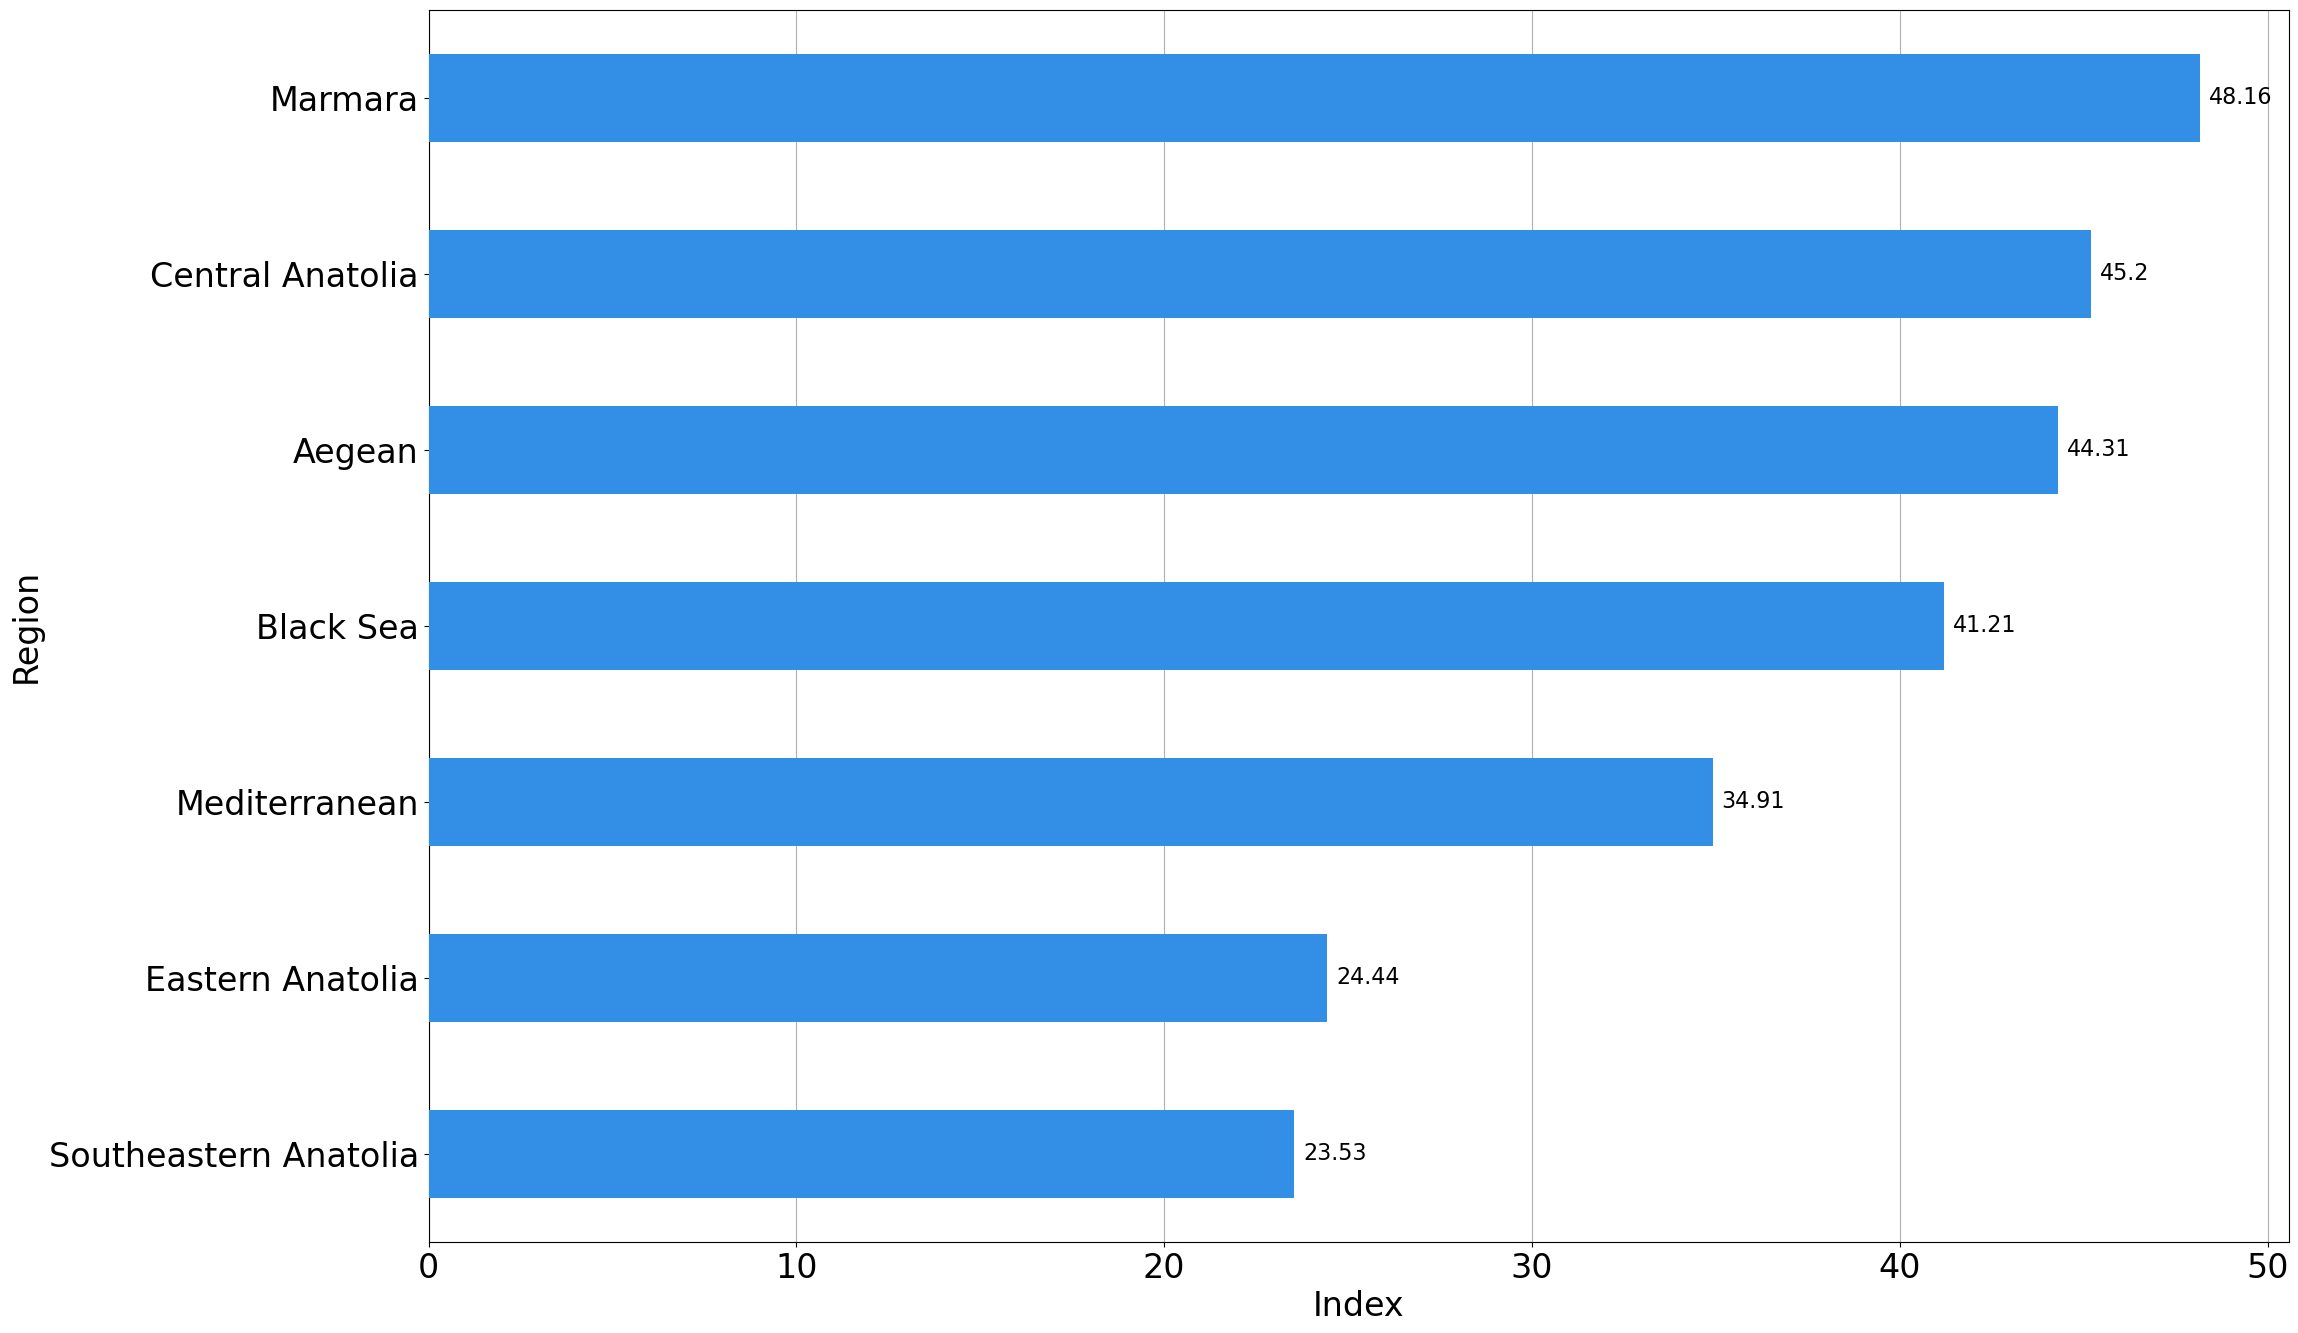

In [73]:
df_regions_2018 = df_data_2018.groupby(['Region'])[['Region', 'Index']].mean(numeric_only=True).reset_index().round(2)

fig, ax2 = plt.subplots()
df_regions_2018.sort_values(by=['Index']).plot(ax=ax2 ,kind='barh',
                                                x='Region', y='Index', color=(0.2, 0.56,0.90),
                                                figsize=(24,16), legend=False, zorder=5, fontsize=24)
ax2.grid(axis='x', zorder=0)
ax2.bar_label(ax2.containers[0], padding=6.5, fontsize=16)
ax2.set_xlabel(xlabel='Index', fontsize=24)
ax2.set_ylabel(ylabel='Region', fontsize=24)   

In [74]:
df_data_2018.groupby(['Region'])[['Region', 'Index', 'Culture', 'Education', 'Healthcare', 'NaturalDisasters', 'Economy']].mean(numeric_only=True).reset_index().round(2).sort_values(by='Index', ascending=False)


,Region,Index,Culture,Education,Healthcare,NaturalDisasters,Economy
4,Marmara,48.16,54.32,40.50,40.71,-36.10,77.01
2,Central Anatolia,45.20,35.39,56.21,46.03,-32.22,59.21
0,Aegean,44.31,46.14,51.64,46.91,-47.41,63.78
1,Black Sea,41.21,39.64,59.33,42.71,-43.35,50.39
5,Mediterranean,34.91,31.99,37.38,45.68,-49.26,57.78
3,Eastern Anatolia,24.44,21.17,45.15,30.36,-53.47,38.59
6,Southeastern Anatolia,23.53,17.20,18.37,27.40,-28.22,43.41


In [75]:
region_18 = df_data_2018.groupby(['Region'])[['Region', 'Index']].mean(numeric_only=True).reset_index().round(2)
region_17 = df_data_2017.groupby(['Region'])[['Region', 'Index']].mean(numeric_only=True).reset_index().round(2)

region_merged = pd.merge(region_17, region_18, on='Region')
region_merged.columns = ['Region', '2017', '2018']
region_merged.sort_values(by='2018',ascending=True, inplace=True)
region_merged

,Region,2017,2018
6,Southeastern Anatolia,26.42,23.53
3,Eastern Anatolia,27.82,24.44
5,Mediterranean,38.06,34.91
1,Black Sea,46.48,41.21
0,Aegean,46.02,44.31
2,Central Anatolia,48.88,45.20
4,Marmara,50.22,48.16


Text(0, 0.5, 'Region')

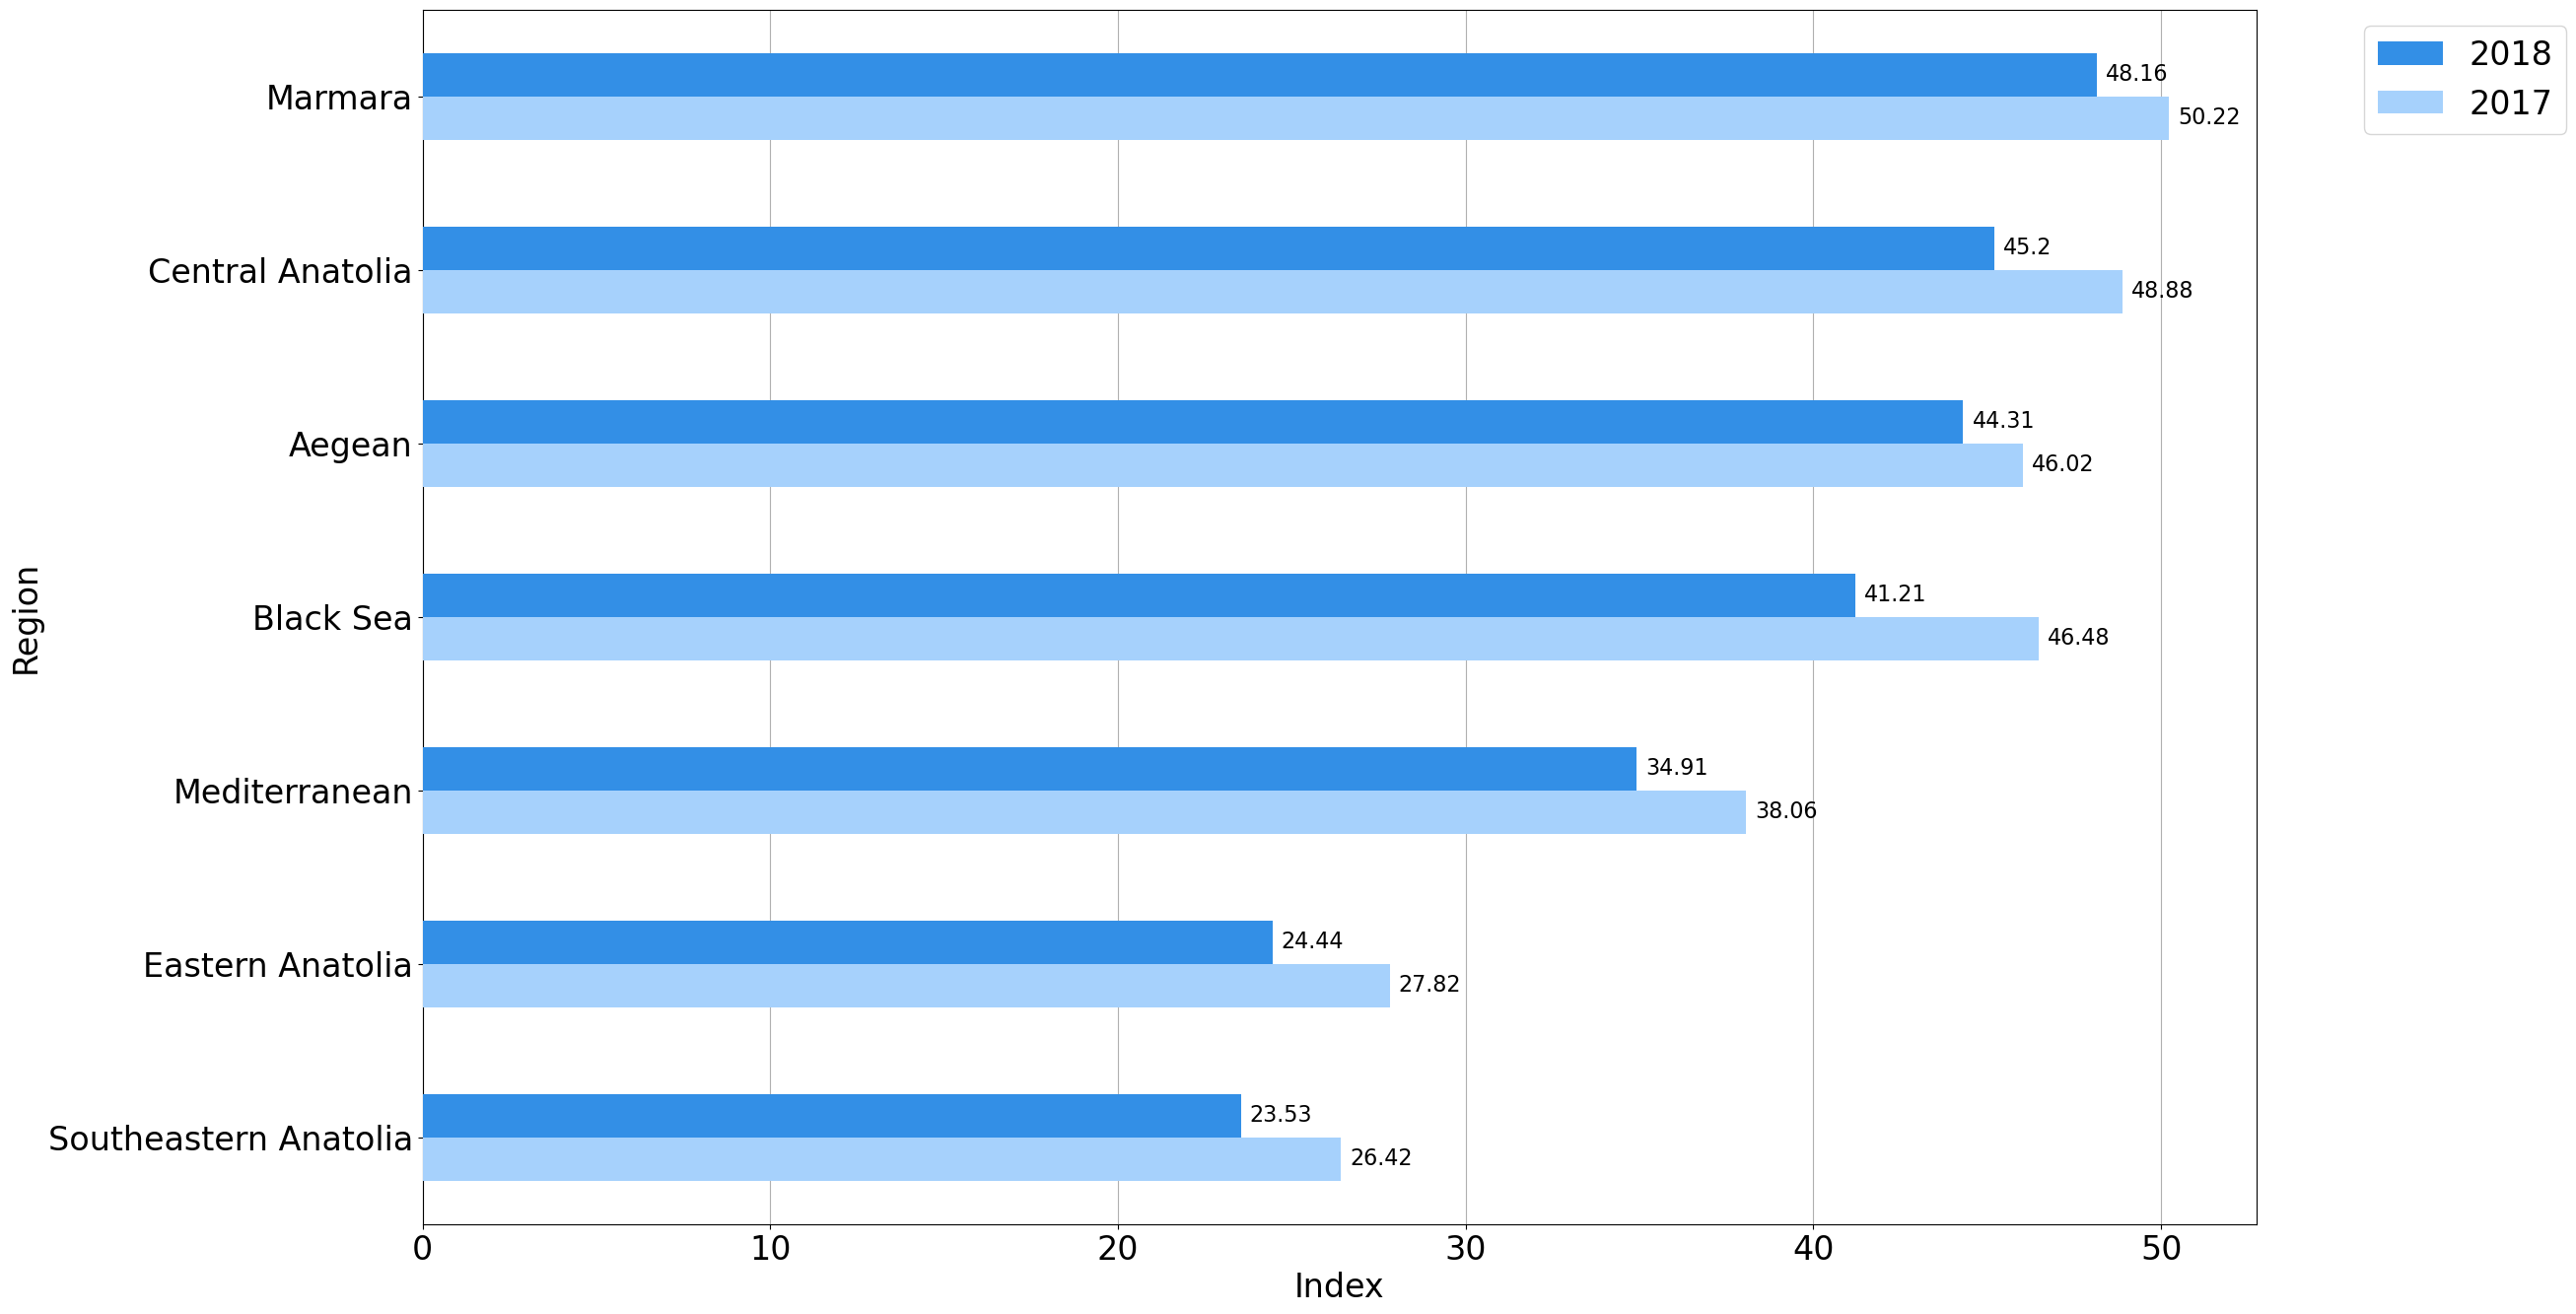

In [76]:
ax = region_merged.plot(kind='barh', x='Region',
                        color=[blue_2, blue_1], figsize=(24,16),
                       zorder=5, fontsize=24)

ax.grid(axis='x', zorder=0)
ax.bar_label(ax.containers[0], padding=6.5, fontsize=16)
ax.bar_label(ax.containers[1], padding=6.5, fontsize=16)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], 
          bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=24)

ax.set_xlabel(xlabel='Index', fontsize=24)
ax.set_ylabel(ylabel='Region', fontsize=24)

### Top 10 positions for 2017

In [77]:
df_data_2017[columns].sort_values(by='Rank').head(10)

,Province,Rank,Index,Culture,Education,Healthcare,Economy,NaturalDisasters
24,Edirne,1,80.21,80.71,68.00,97.84,60.13,-10.90
18,Bolu,2,75.24,100.00,55.41,100.00,71.05,-50.50
5,Ankara,3,67.29,64.03,40.22,89.51,81.18,-30.70
28,Eskişehir,4,62.94,66.45,45.36,68.34,72.47,-25.75
55,Nevşehir,5,62.73,78.04,89.35,28.16,51.30,-20.80
77,İstanbul,6,59.50,83.26,10.77,49.82,100.00,-30.70
8,Artvin,7,56.44,71.00,71.15,35.56,39.08,-15.85
46,Kırklareli,8,55.56,40.67,51.01,34.51,72.23,-1.00
78,İzmir,9,55.42,71.06,32.49,65.87,77.97,-50.50
34,Isparta,10,54.90,25.20,75.83,93.27,50.99,-50.50


### Bottom 10 positions for 2017

In [78]:
df_data_2017[columns].sort_values(by='Rank').tail(10)


,Province,Rank,Index,Culture,Education,Healthcare,Economy,NaturalDisasters
13,Batman,72,23.52,15.80,16.19,26.18,37.17,-25.75
16,Bingöl,73,22.26,41.22,40.82,30.93,31.80,-80.20
17,Bitlis,74,20.67,16.17,34.43,35.69,32.35,-60.40
1,Adıyaman,75,20.45,13.98,27.72,29.27,36.86,-50.50
10,Ağrı,76,20.09,20.78,17.48,11.25,42.04,-35.65
54,Muş,77,16.03,19.08,29.25,14.64,27.23,-50.50
70,Van,78,15.92,15.38,9.06,36.55,43.65,-65.35
80,Şırnak,79,12.53,1.00,9.33,1.00,45.13,-30.70
79,Şanlıurfa,80,10.96,17.74,1.74,19.82,1.00,-20.80
32,Hakkari,81,0.00,9.37,1.00,6.18,9.70,-50.50


### Regions 2017

Text(0, 0.5, 'Region')

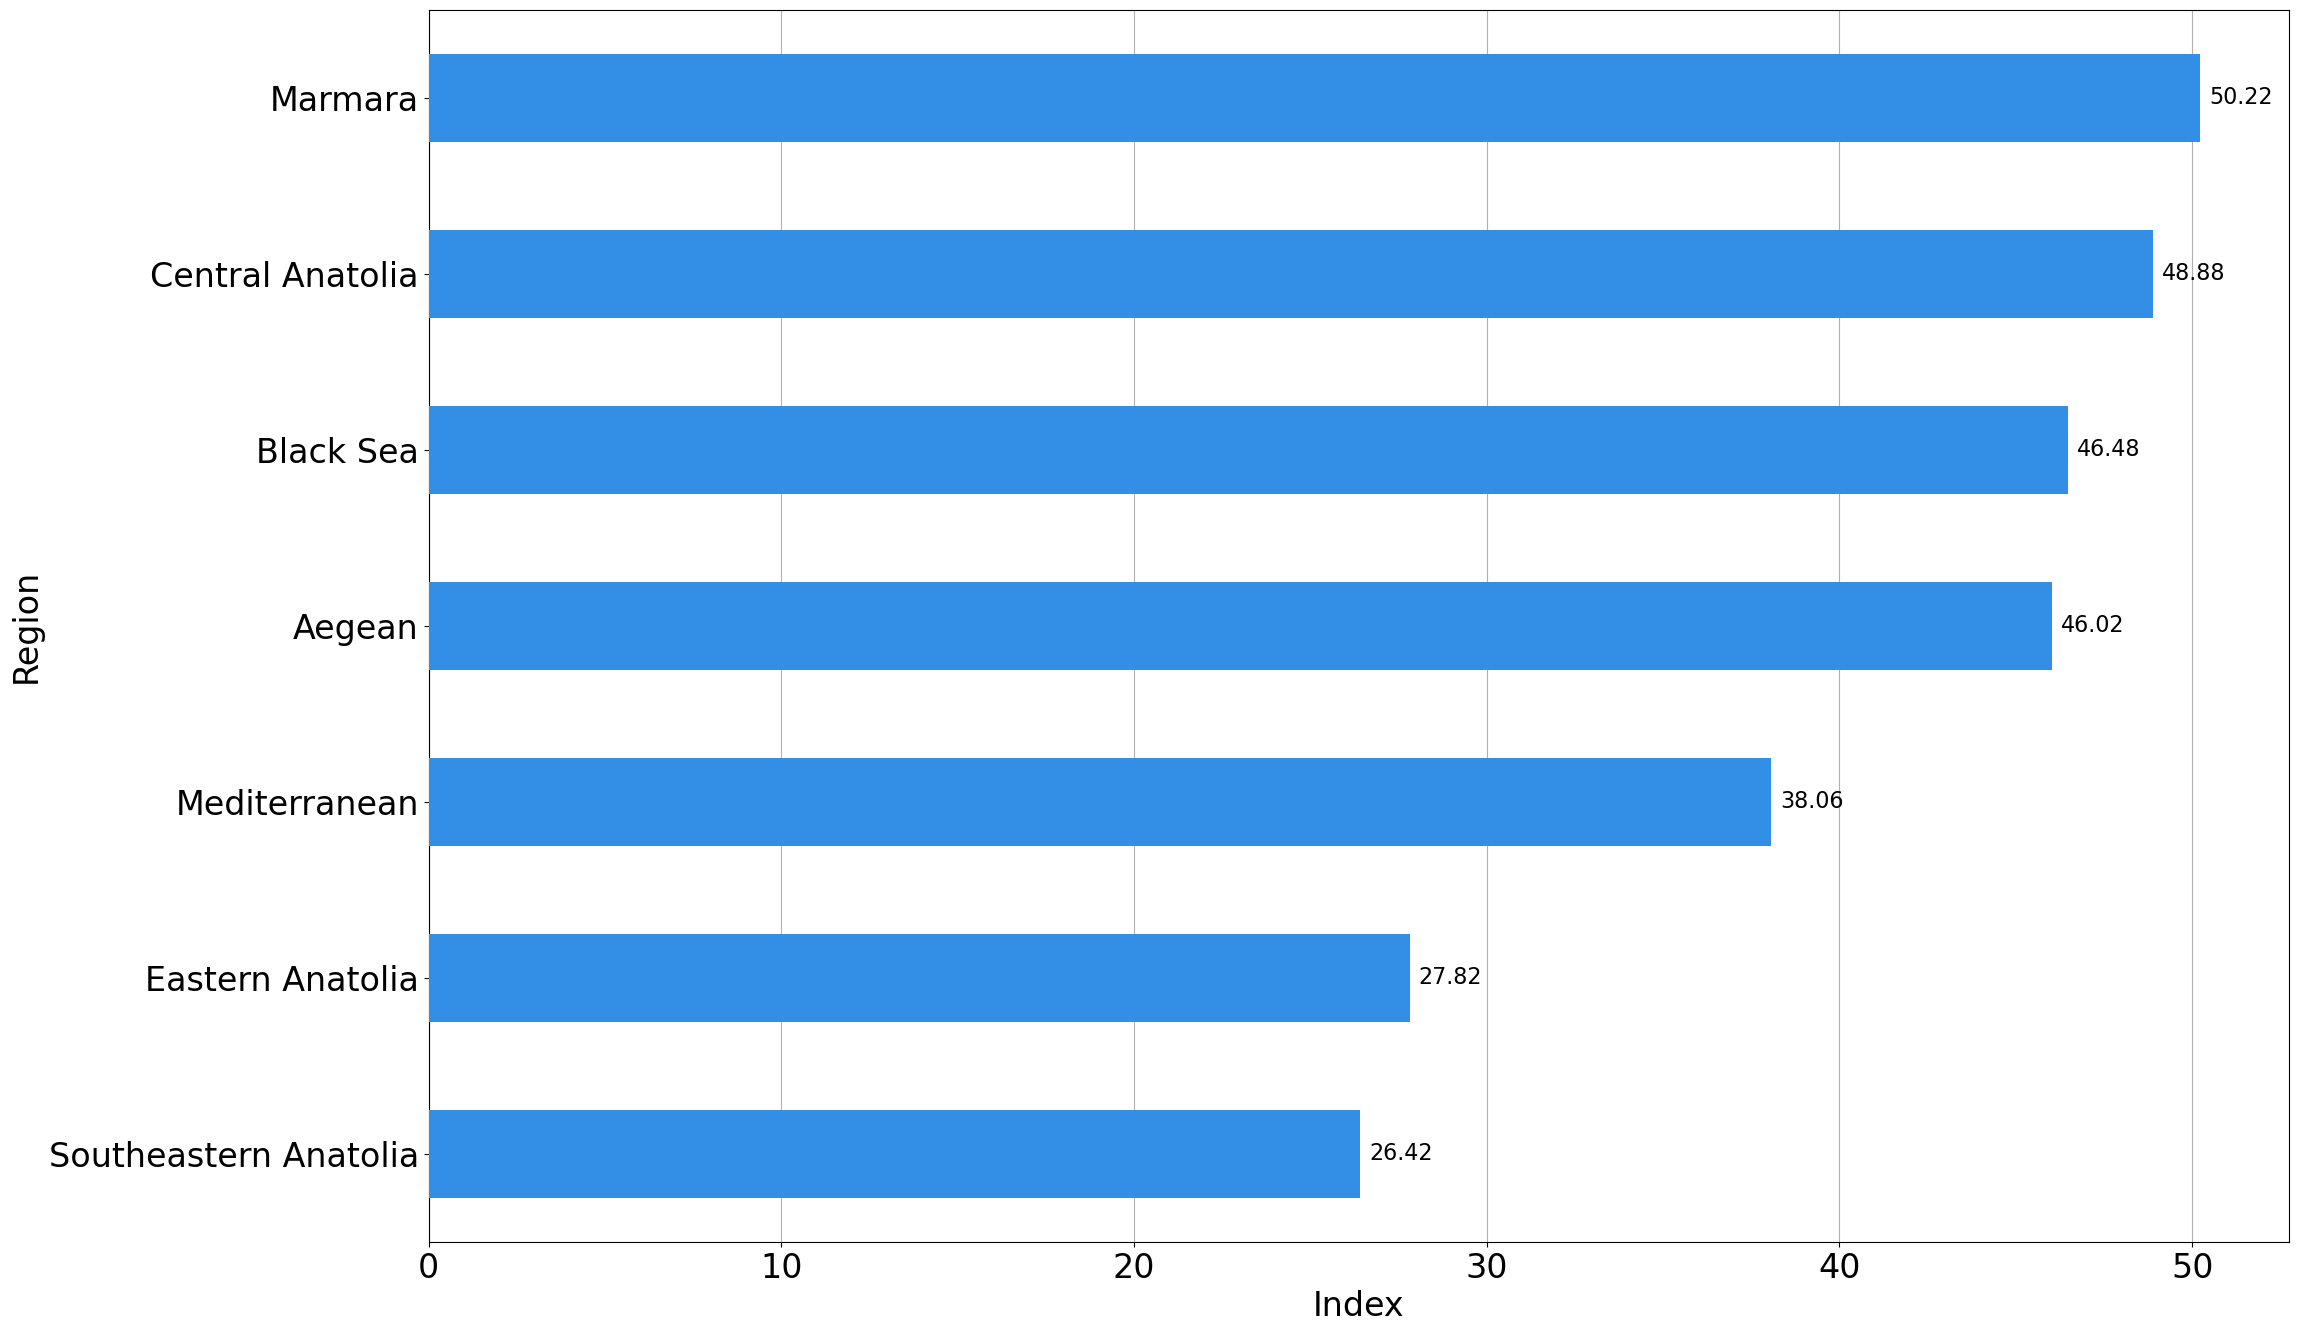

In [79]:
df_regions_2017 = df_data_2017.groupby(['Region'])[['Region', 'Index']].mean(numeric_only=True).reset_index().round(2)

fig, ax2 = plt.subplots()
df_regions_2017.sort_values(by=['Index']).plot(ax=ax2 ,kind='barh',
                                                x='Region', y='Index', color=(0.2, 0.56,0.90),
                                                figsize=(24,16), legend=False, zorder=5, fontsize=24)
ax2.grid(axis='x', zorder=0)
ax2.bar_label(ax2.containers[0], padding=6.5, fontsize=16)
ax2.set_xlabel(xlabel='Index', fontsize=24)
ax2.set_ylabel(ylabel='Region', fontsize=24)   

In [80]:
df_data_2017.groupby(['Region'])[['Region', 'Index', 'Culture', 'Education', 'Healthcare', 'NaturalDisasters', 'Economy']].mean(numeric_only=True).reset_index().round(2).sort_values(by='Index', ascending=False)


,Region,Index,Culture,Education,Healthcare,NaturalDisasters,Economy
4,Marmara,50.22,56.19,38.91,41.83,-36.10,75.30
2,Central Anatolia,48.88,41.96,54.14,50.73,-32.22,56.16
1,Black Sea,46.48,46.97,56.20,48.41,-43.35,52.97
0,Aegean,46.02,45.91,47.39,50.38,-47.41,63.10
5,Mediterranean,38.06,34.92,36.63,48.09,-49.26,57.23
3,Eastern Anatolia,27.82,23.75,38.15,35.55,-53.47,42.76
6,Southeastern Anatolia,26.42,24.89,14.62,31.35,-28.22,38.52


In [81]:
df_all = pd.DataFrame({2017: df_data_2017['Index'],
                      2018: df_data_2018['Index'],
                      2019: df_data_2019['Index'],
                      2020: df_data_2020['Index'],
                      2021: df_data_2021['Index']})
df_all.head()

,2017,2018,2019,2020,2021
0,38.12,33.14,29.71,31.52,32.69
1,20.45,19.82,15.80,15.02,13.82
2,41.06,35.83,36.99,36.70,41.59
3,35.07,32.58,30.48,33.04,26.92
4,43.79,37.15,35.58,33.68,33.99


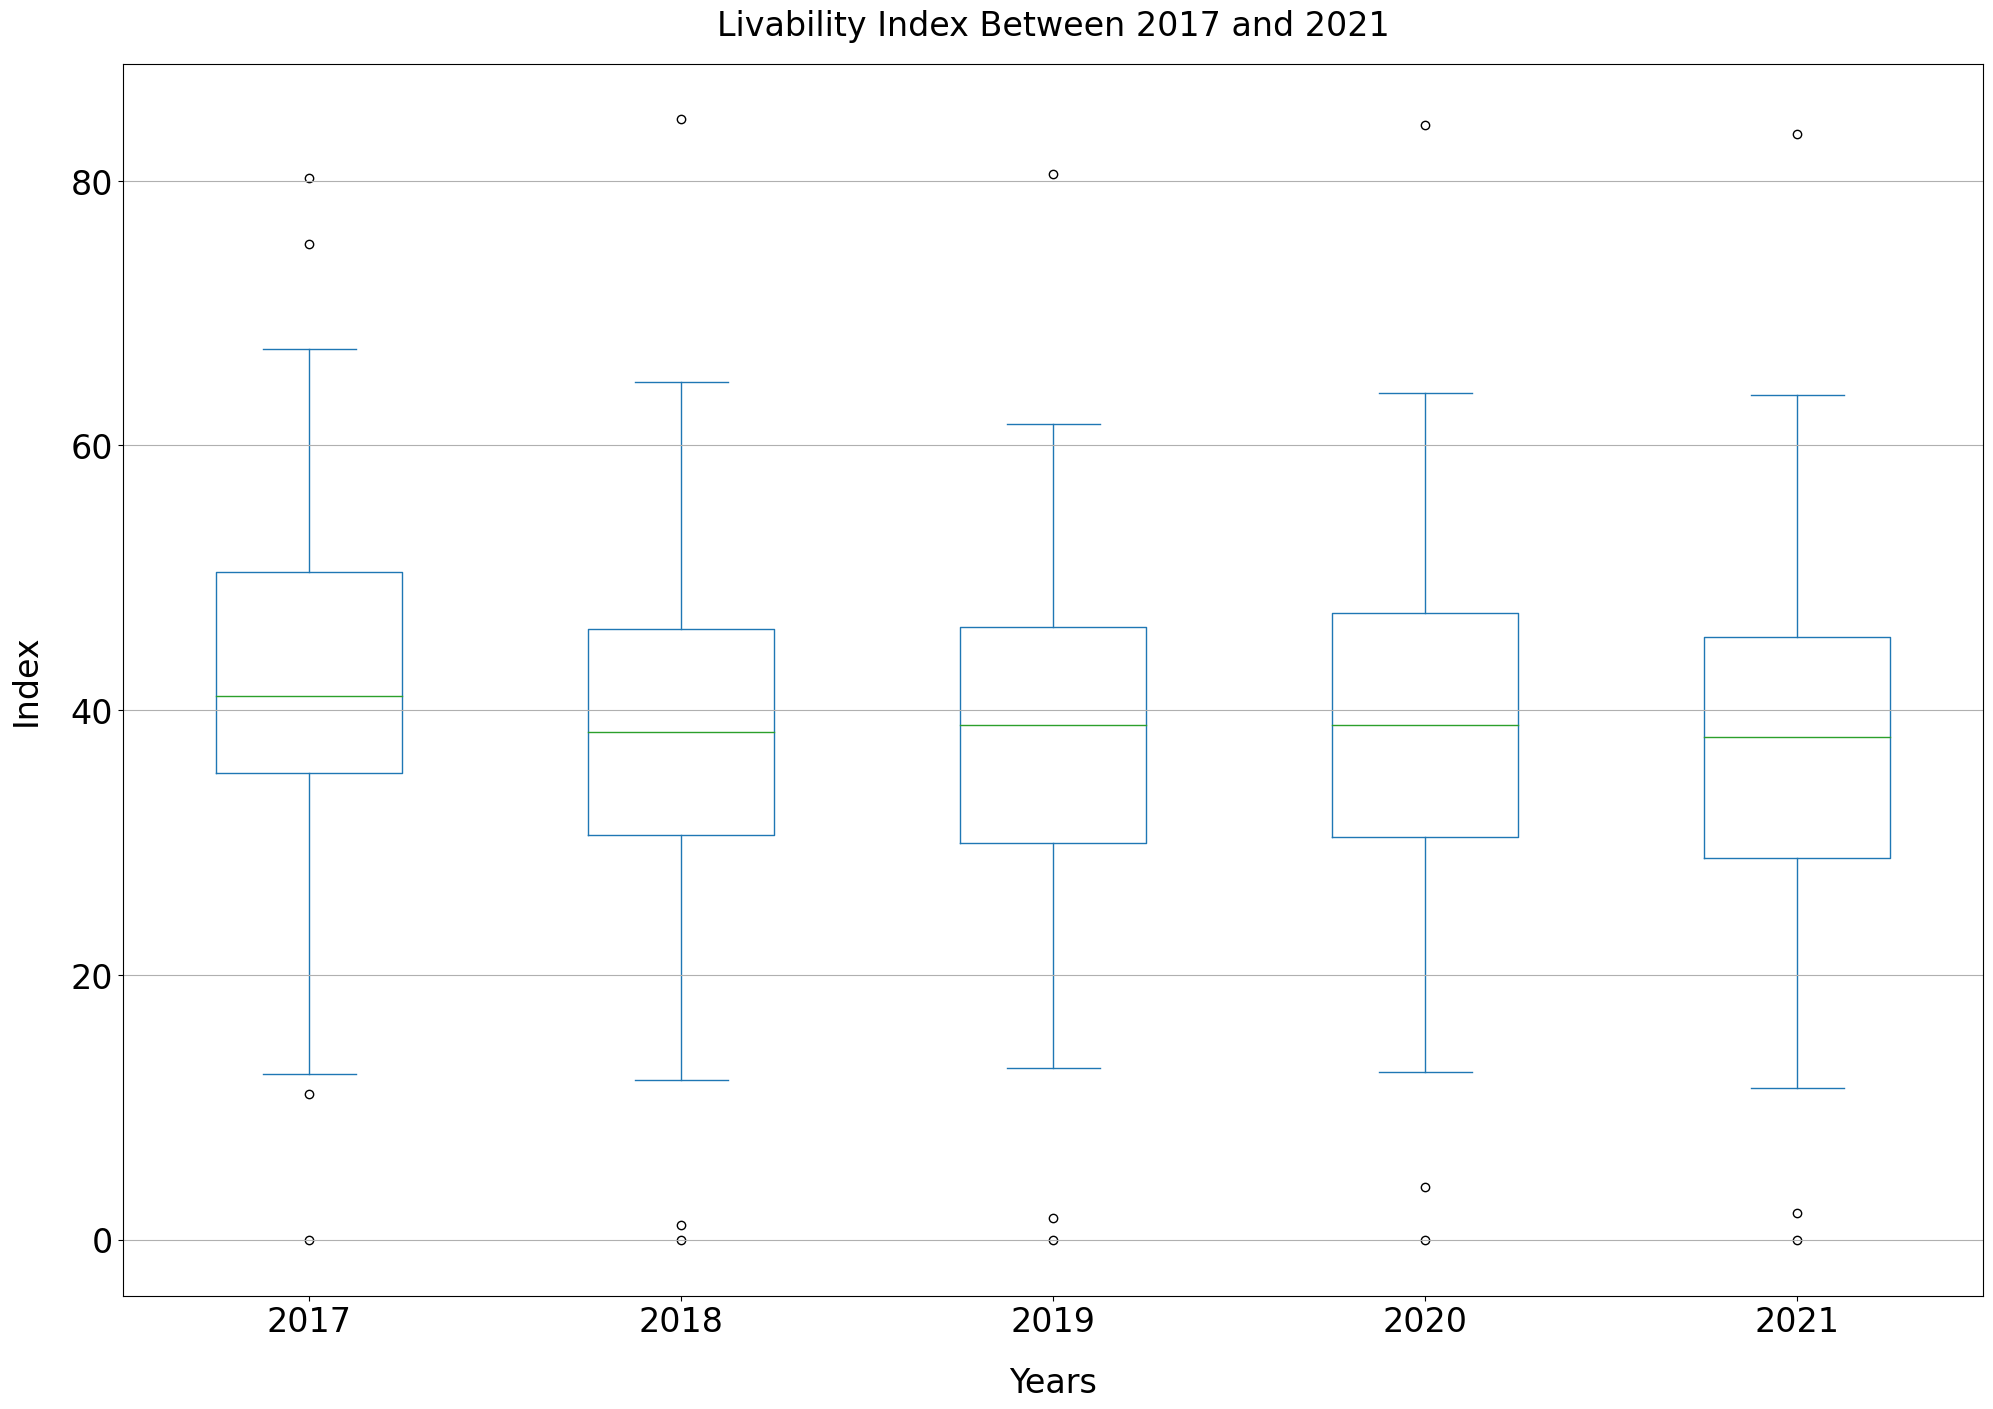

In [88]:
ax = df_all.plot(kind='box', figsize=(24,16),
           fontsize=24, zorder=1)
ax.grid(axis='y', zorder=0)

plt.title("Livability Index Between 2017 and 2021", fontsize=24, pad=20.5)
ax.set_xlabel("Years", fontsize=24, labelpad=20)
ax.set_ylabel("Index", fontsize=24, labelpad=20)
plt.show()